![](https://www.extensiv.com/hubfs/Skubana/Blog%20Pages/Imported_Blog_Media/big%20data%20analytics%2C%20business%20team%20working%20on%20computer-Oct-12-2022-05-51-21-63-PM.jpg)


# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:center; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'></span></b> <b>Table des matières </b></div>

* [1. Importing Libraries](#1)
* [2. Chargement de l'ensemble de données](#2)
* [3. Exploration Approfondie des Données EDA](#3)
* [4. Data Preprocessing](#4)
* [5. Exploratory Data Analysis](#5)
* [6. Modélisation de Série Temporelle ](#6)
* [7. Modélisation avec Variables Exogènes ](#7)
* [8. Résultats et Analyses](#8)

<a id='1'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>1 |</span></b> <b>Importation de Bibliothèques</b></div>

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from IPython.display import HTML as html_print
import warnings


import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf, pacf

from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler


from termcolor import colored
from IPython.display import display
warnings.filterwarnings('ignore')

<a id='2'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>2 |</span></b> <b>Chargement de l'ensemble de données</b></div>

In [3]:
# Charger les données
path = "/content/sample_data/Dataset.xlsx"
indices_generaux = pd.read_excel(path, sheet_name="Indices Généraux", parse_dates=["SEANCE"], )
avoirs_officiels = pd.read_excel(path, sheet_name="Avoirs officiels de réserve", parse_dates=["DATE"])
change = pd.read_excel(path, sheet_name="CHANGE", parse_dates=["Date"])
monia = pd.read_excel(path, sheet_name="MONIA", parse_dates=["Date de référence"])
tmp = pd.read_excel(path, sheet_name="TMP", parse_dates=["SEANCE"])
inlfation = pd.read_excel(path, sheet_name="Inlfation", parse_dates=["MOIS"])
indices_taux = pd.read_excel(path, sheet_name="Indices Taux", parse_dates=["Étiquettes de lignes"])
indices_sectoriels = pd.read_excel(path, sheet_name="Indices Sectorielles", parse_dates=["Étiquettes de lignes"])

# Afficher les premières lignes des deux feuilles
print("\nAvoirs Les indices genereaux:")
indices_generaux.head()



Avoirs Les indices genereaux:


,SEANCE,INDICE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
0,2023-12-08,MASI,11885.32,11885.32,11824.97,11827.02,11827.02,0.49
1,2023-12-07,MASI,11827.02,11827.02,11757.60,11757.60,11757.60,0.59
2,2023-12-06,MASI,11757.60,11792.95,11718.07,11759.51,11759.51,-0.02
3,2023-12-05,MASI,11759.51,11785.10,11709.49,11728.06,11728.06,0.27
4,2023-12-04,MASI,11728.06,11769.43,11702.27,11748.19,11748.19,-0.17


<a id='3'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3 |</span></b> <b> Exploration Approfondie des Données </b></div>

### Exploration de Indices Generaux

In [8]:
indices_generaux.shape

(2366, 8)

In [9]:
indices_generaux.describe()

,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,11007.492700,11046.029461,10962.958392,11003.195150,11006.688533,-0.001067
std,1228.034432,1234.011316,1225.577153,1230.984464,1228.639022,0.344325
min,8796.650391,8837.969727,8789.889648,8796.650391,8796.650391,-3.820000
25%,9927.517578,9957.692383,9888.077393,9923.909678,9927.104736,-0.004097
50%,11159.635254,11201.135254,11119.455078,11156.564941,11158.260254,0.000210
75%,11969.242559,12012.205000,11918.409902,11971.260000,11971.260000,0.004357
max,13991.470000,14012.640000,13950.560000,13991.470000,13991.470000,5.080000


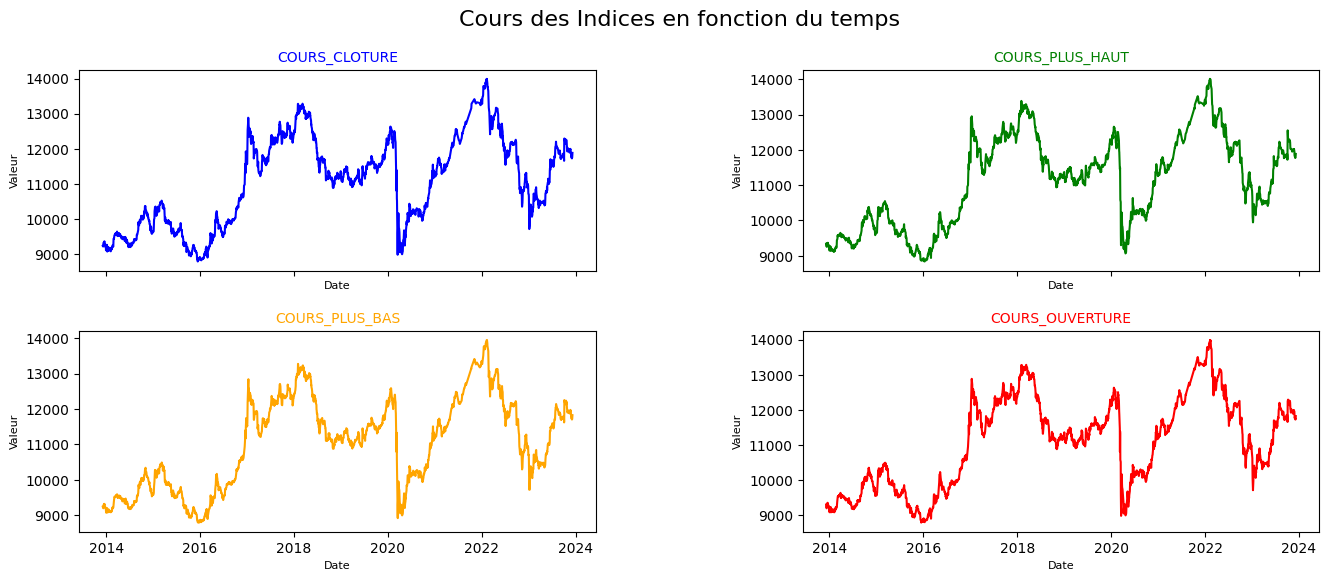

In [4]:
# Create a 2x2 grid of subplots with increased spacing
fig, axs = plt.subplots(2, 2, figsize=(16, 6), sharex=True, gridspec_kw={'hspace': 0.3, 'wspace': 0.4})

# Define colors for each plot
colors = ['blue', 'green', 'orange', 'red']

# Plot each subplot with a different color and increased spacing
for i, (ax, column, color) in enumerate(zip(axs.flatten(), indices_generaux.columns[2:], colors)):
    ax.plot(indices_generaux["SEANCE"], indices_generaux[column], label=column, color=color)
    ax.set_title(column, fontsize=10, color=color)
    ax.set_xlabel("Date", fontsize=8)
    ax.set_ylabel("Valeur", fontsize=8)


# Adjust layout
plt.tight_layout()

# Set a common title for all subplots
plt.suptitle("Cours des Indices en fonction du temps", fontsize=16)

# Save the plot as a PNG file
plt.savefig('cours_indices_plot.png')

# Show the plots
plt.show()

In [518]:
indices_generaux.describe()

,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,11007.492700,11046.029461,10962.958392,11003.195150,11006.688533,-0.001067
std,1228.034432,1234.011316,1225.577153,1230.984464,1228.639022,0.344325
min,8796.650391,8837.969727,8789.889648,8796.650391,8796.650391,-3.820000
25%,9927.517578,9957.692383,9888.077393,9923.909678,9927.104736,-0.004097
50%,11159.635254,11201.135254,11119.455078,11156.564941,11158.260254,0.000210
75%,11969.242559,12012.205000,11918.409902,11971.260000,11971.260000,0.004357
max,13991.470000,14012.640000,13950.560000,13991.470000,13991.470000,5.080000


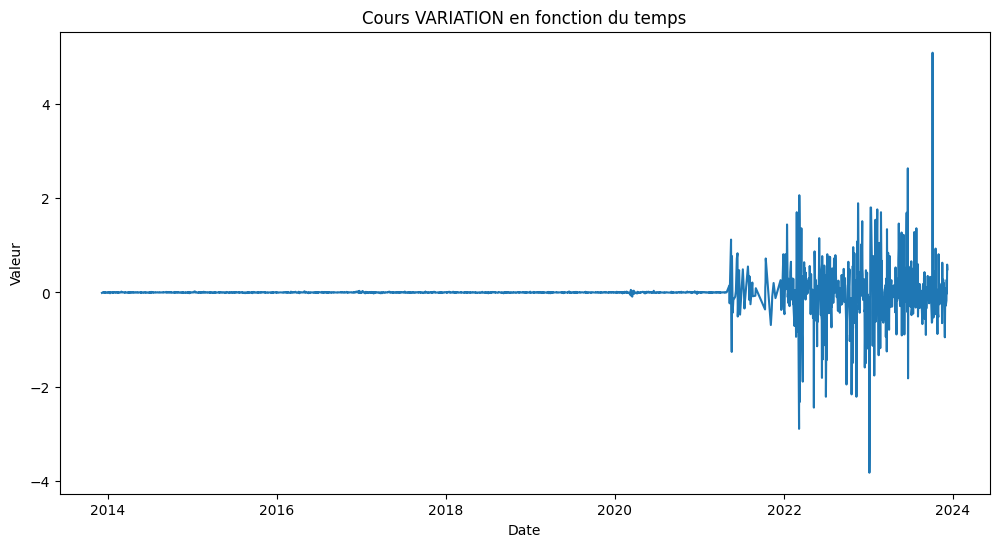

In [5]:
# Créer un graphique
plt.figure(figsize=(12, 6))

# Tracer les cours pour chaque indice
plt.plot(indices_generaux["SEANCE"], indices_generaux["VARIATION"], label="VARIATION")

# Ajouter des légendes et un titre
plt.title("Cours VARIATION en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Valeur")

# Afficher le graphique
plt.show()

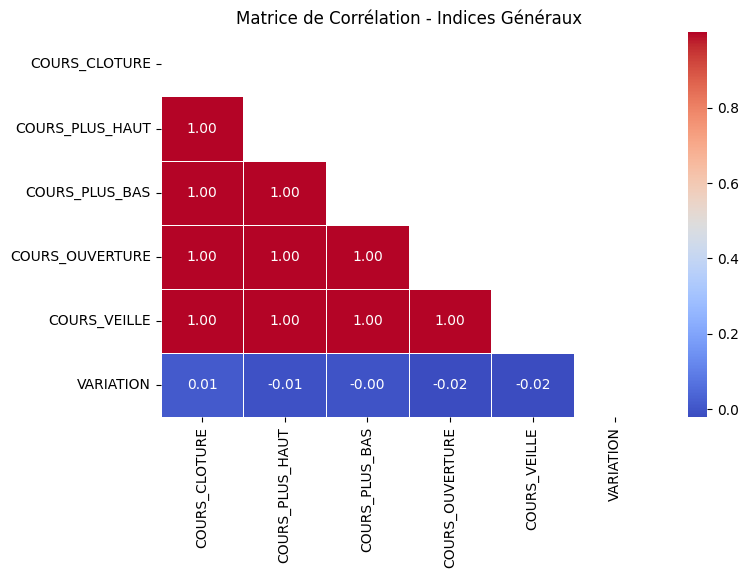

In [6]:
# Calculer la matrice de corrélation
indices_gen = indices_generaux.drop(['SEANCE', 'INDICE'], axis=1)
correlation_matrix = indices_gen.corr()

# Créer une matrice masquée pour la moitié supérieure
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Visualiser la carte de chaleur avec la moitié inférieure masquée
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)

# Ajouter un titre
plt.title('Matrice de Corrélation - Indices Généraux')

# Sauvegarder la carte de chaleur comme un fichier PNG
plt.savefig('correlation_matrix_heatmap.png')

# Afficher la carte de chaleur
plt.show()



### Exploration de Avoirs officiels de réserve

In [10]:
avoirs_officiels.shape

(207, 7)

In [11]:
avoirs_officiels.describe()

,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,318.721258,12.583768,18.090473,271.568289,1.957151,14.527534
std,28.083077,1.070565,5.140158,22.118081,0.058049,6.034526
min,247.751000,10.560000,6.992000,218.044000,1.871077,6.852960
25%,300.747593,11.672304,15.006020,255.733000,1.903109,7.510500
50%,324.153140,12.590958,17.863413,274.850257,1.957449,18.945310
75%,338.558395,13.455218,21.087087,284.093164,1.994542,19.695408
max,363.692490,14.600335,31.386899,309.361444,2.076412,20.403429


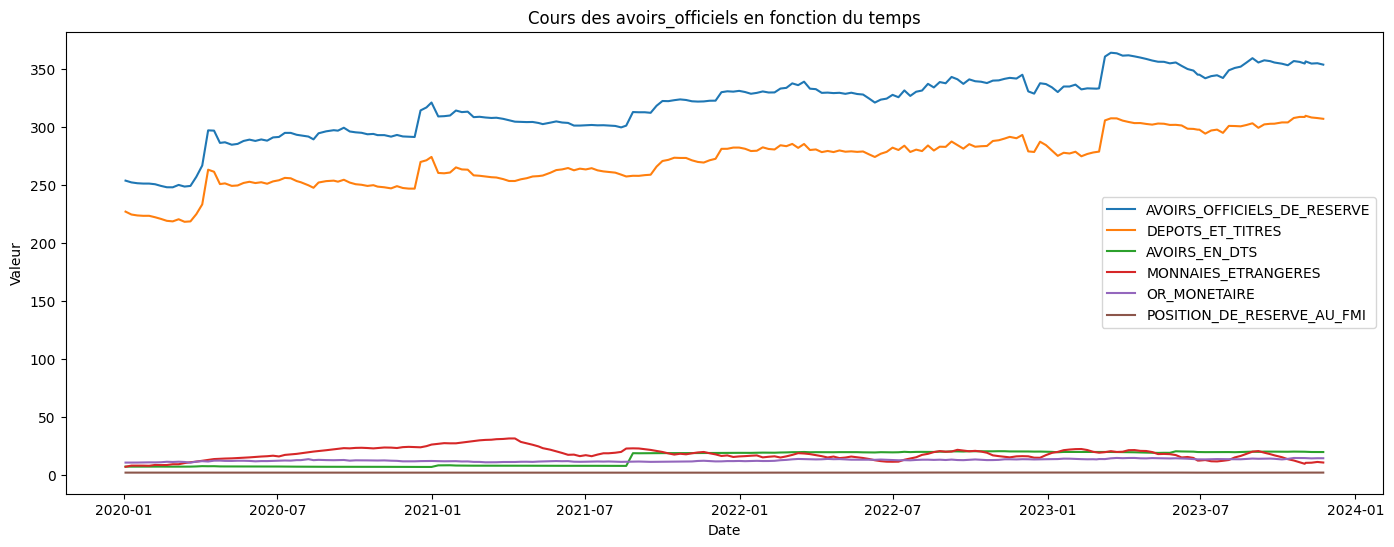

In [12]:
# Créer un graphique
plt.figure(figsize=(17, 6))

plt.plot(avoirs_officiels["DATE"], avoirs_officiels["AVOIRS_OFFICIELS_DE_RESERVE"], label="AVOIRS_OFFICIELS_DE_RESERVE")
plt.plot(avoirs_officiels["DATE"], avoirs_officiels["DEPOTS_ET_TITRES"], label="DEPOTS_ET_TITRES")
plt.plot(avoirs_officiels["DATE"], avoirs_officiels["AVOIRS_EN_DTS"], label="AVOIRS_EN_DTS")
plt.plot(avoirs_officiels["DATE"], avoirs_officiels["MONNAIES_ETRANGERES"], label="MONNAIES_ETRANGERES")
plt.plot(avoirs_officiels["DATE"], avoirs_officiels["OR_MONETAIRE"], label="OR_MONETAIRE")
plt.plot(avoirs_officiels["DATE"], avoirs_officiels["POSITION_DE_RESERVE_AU_FMI"], label="POSITION_DE_RESERVE_AU_FMI")

# Ajouter des légendes et un titre
plt.legend()
plt.title("Cours des avoirs_officiels en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Valeur")

# Afficher le graphique
plt.show()

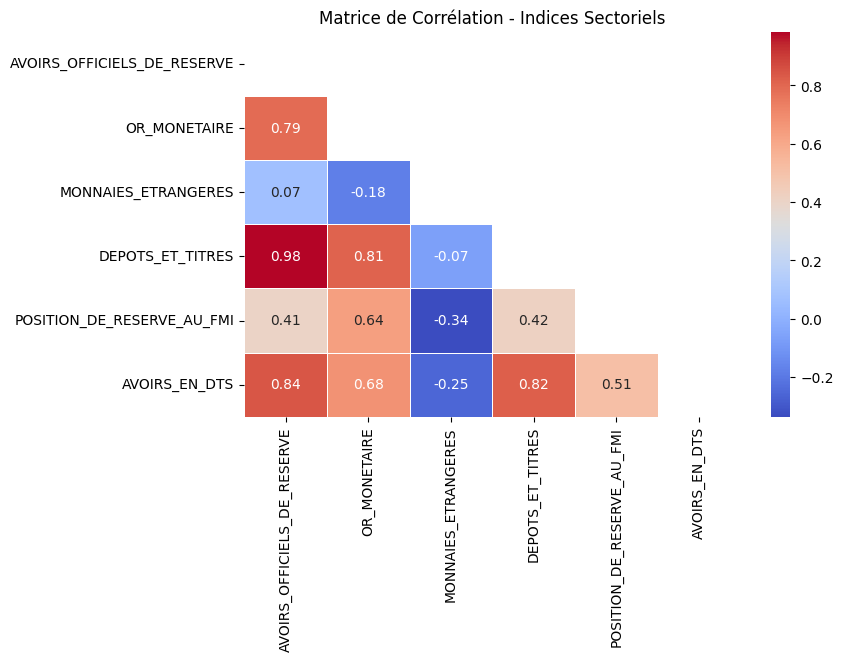

In [13]:
# Calculer la matrice de corrélation
avoirs_officiels_gen = avoirs_officiels.drop(['DATE'],axis = 1)
correlation_matrix = avoirs_officiels_gen.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Paramètres de la figure
plt.figure(figsize=(8, 5))

# Créer une heatmap triangulaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=.5)

plt.title('Matrice de Corrélation - Indices Sectoriels')
plt.show()

### Exploration de CHANGE

In [15]:
change.shape

(1000, 6)

In [16]:
change.describe()

,Cours Minimum,Cours Maximum
count,1000.000000,1000.000000
mean,9.528560,10.531566
std,0.220119,0.243290
min,9.114000,10.073300
25%,9.388650,10.376925
50%,9.500100,10.500100
75%,9.622050,10.634900
max,10.161900,11.231600


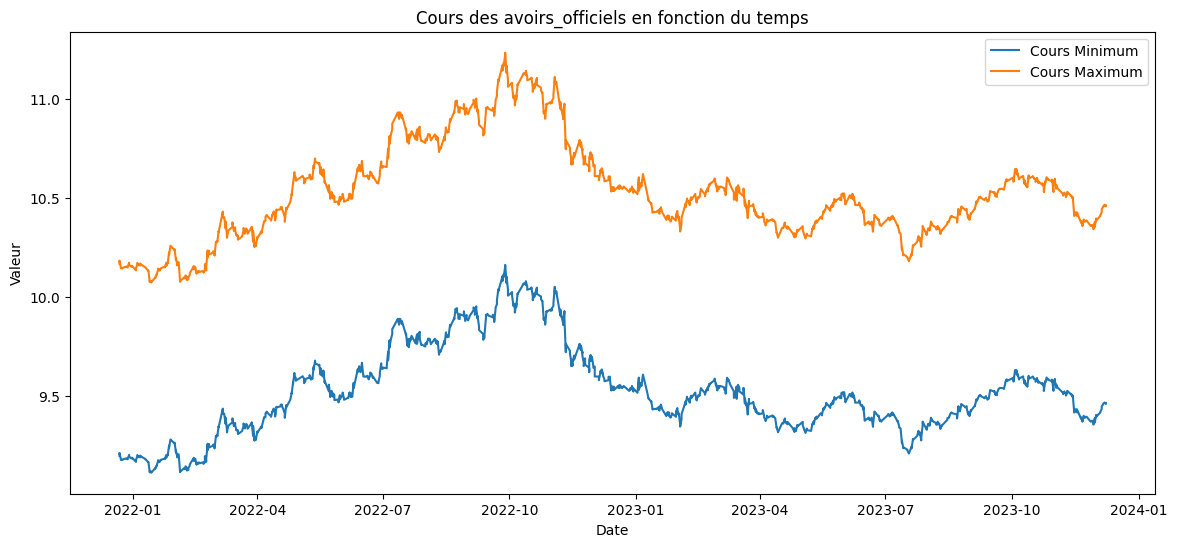

In [24]:
# Créer un graphique
plt.figure(figsize=(14, 6))

# Tracer les cours pour chaque indice
plt.plot(change["Date"], change["Cours Minimum"], label="Cours Minimum")
plt.plot(change["Date"], change["Cours Maximum"], label="Cours Maximum")

# Ajouter des légendes et un titre
plt.legend()
plt.title("Cours des avoirs_officiels en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Valeur")

# Afficher le graphique
plt.show()

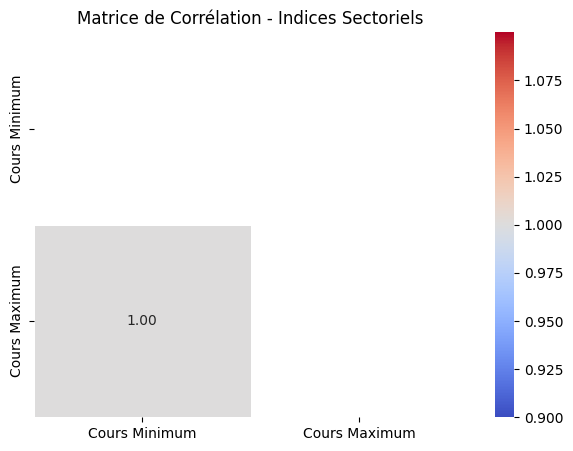

In [25]:
# Calculer la matrice de corrélation
avoirs_officiels_gen = change.drop(["DATE_D'EXTRACTION",'Date','Heure','Devises'],axis = 1)
correlation_matrix = avoirs_officiels_gen.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Paramètres de la figure
plt.figure(figsize=(7, 5))

# Créer une heatmap triangulaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=.5)

plt.title('Matrice de Corrélation - Indices Sectoriels')
plt.show()

### Exploration de MONIA

In [26]:
monia.shape

(985, 3)

In [27]:
monia.describe()

,Indice MONIA,Volume JJ
count,985.000000,985.000000
mean,1.862747,8694.147208
std,0.584313,2346.106315
min,1.299000,2965.000000
25%,1.421000,6972.000000
50%,1.438000,8405.000000
75%,2.223000,10076.000000
max,3.018000,19656.000000


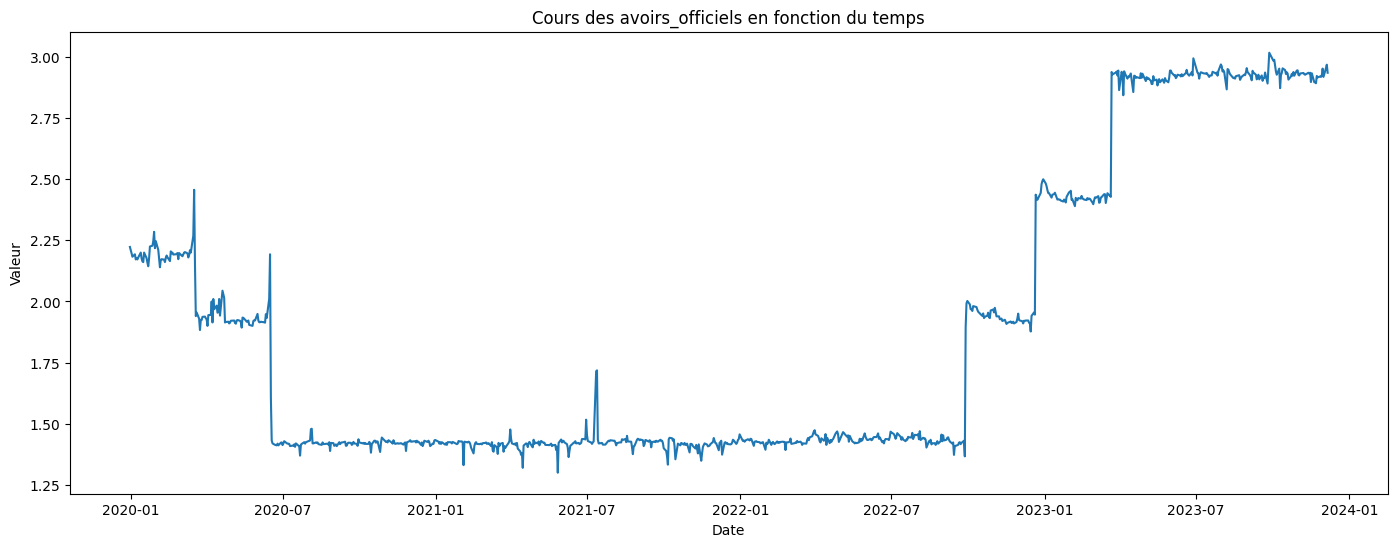

In [28]:
# Créer un graphique
plt.figure(figsize=(17, 6))

# Tracer les cours pour chaque indice
plt.plot(monia["Date de référence"], monia["Indice MONIA"], label="Indice MONIA")

# Ajouter des légendes et un titre
plt.title("Cours des avoirs_officiels en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Valeur")

# Afficher le graphique
plt.show()

### Exploration de TMP

In [29]:
tmp.describe()

,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS
count,963.000000,894.000000,963.000000
mean,2.043404,2912.486577,8519.503634
std,0.655060,2115.336598,1871.214937
min,1.500000,0.000000,3465.000000
25%,1.500000,0.000000,7300.000000
50%,1.501000,3141.000000,8317.000000
75%,3.000000,4390.500000,9452.500000
max,3.007000,15609.000000,18364.000000


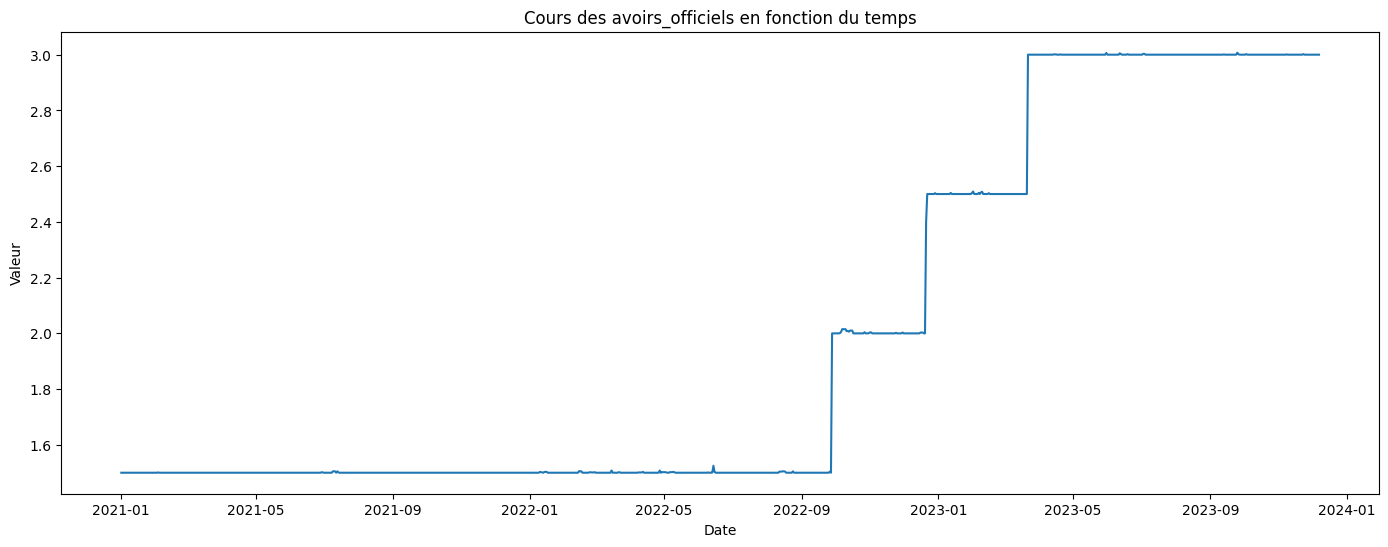

In [30]:
# Créer un graphique
plt.figure(figsize=(17, 6))

# Tracer les cours pour chaque indice
plt.plot(tmp["SEANCE"], tmp["TAUX MOYEN PONDERE"], label="TAUX MOYEN PONDERE")
#plt.plot(tmp["SEANCE"], tmp["ENCOURS"], label="ENCOURS")
#plt.plot(tmp["SEANCE"], tmp["VOLUME JJ"], label="VOLUME JJ")

# Ajouter des légendes et un titre
plt.title("Cours des avoirs_officiels en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Valeur")

# Afficher le graphique
plt.show()

### Exploration de Inflation

In [31]:
inlfation.shape

(21, 3)

In [32]:
inlfation.describe()

,INFLATION,INFLATION_SOUS_JACENTE
count,21.000000,21.000000
mean,6.760611,6.521162
std,1.860537,1.540774
min,3.100000,3.900000
25%,5.263158,5.100000
50%,7.156673,7.300000
75%,8.200000,7.629090
max,10.100000,8.500000


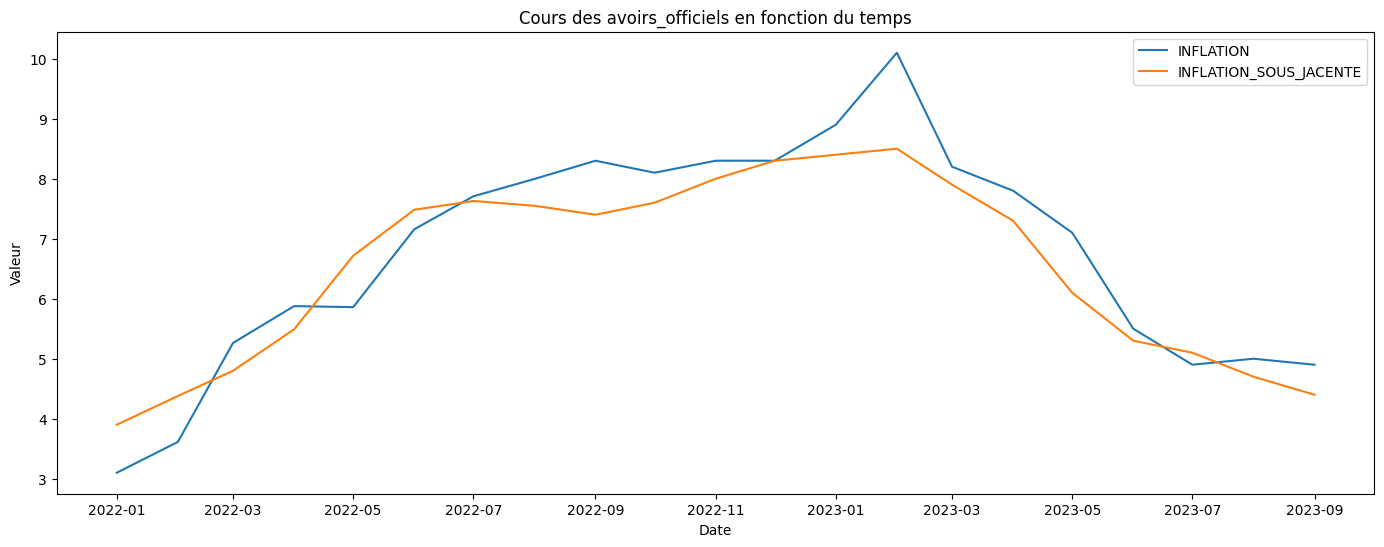

In [33]:
# Créer un graphique
plt.figure(figsize=(17, 6))

# Tracer les cours pour chaque indice
#plt.plot(tmp["SEANCE"], tmp["TAUX MOYEN PONDERE"], label="TAUX MOYEN PONDERE")
plt.plot(inlfation["MOIS"], inlfation["INFLATION"], label="INFLATION")
plt.plot(inlfation["MOIS"], inlfation["INFLATION_SOUS_JACENTE"], label="INFLATION_SOUS_JACENTE")

# Ajouter des légendes et un titre
plt.legend()
plt.title("Cours des avoirs_officiels en fonction du temps")
plt.xlabel("Date")
plt.ylabel("Valeur")

# Afficher le graphique
plt.show()

### Exploration de Indices Taux

In [34]:
# Charger les données depuis le fichier Excel
xls = pd.ExcelFile("/content/sample_data/Dataset.xlsx")
# Charger la feuille Indices Sectorielles
sector_taux_sheet = xls.parse("Indices Taux")
# Convertir la colonne de date en format datetime
sector_taux_sheet['Étiquettes de lignes'] = pd.to_datetime(sector_taux_sheet['Étiquettes de lignes'])
sector_taux_sheet.describe()

,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,150.012447,145.329461,187.041484,201.565420,154.647791,203.986815,201.592423,158.526863,145.469428,197.679209,166.622119,146.617454
std,1.875736,2.473417,9.909070,16.350653,1.413655,21.446924,24.419740,1.629713,2.317870,26.421444,3.487458,2.171000
min,146.923866,141.763410,167.101247,170.031985,151.949788,164.751137,158.038257,154.613067,142.045887,151.231700,158.506218,143.332301
25%,148.678204,143.262862,177.726428,183.183438,153.571741,177.772816,170.130150,157.827056,143.563702,162.804931,165.349175,144.899964
50%,149.931064,144.863868,192.751098,211.728332,154.742588,217.941447,216.688374,158.901157,145.107988,213.035762,167.856565,146.375876
75%,150.561097,147.209959,195.150587,214.517478,155.330657,220.744862,220.086757,159.799772,147.122382,216.483879,169.435541,147.973768
max,154.731984,150.565472,196.692309,217.636004,158.632594,224.363644,224.243569,161.454378,150.484104,223.656641,170.566874,151.512022


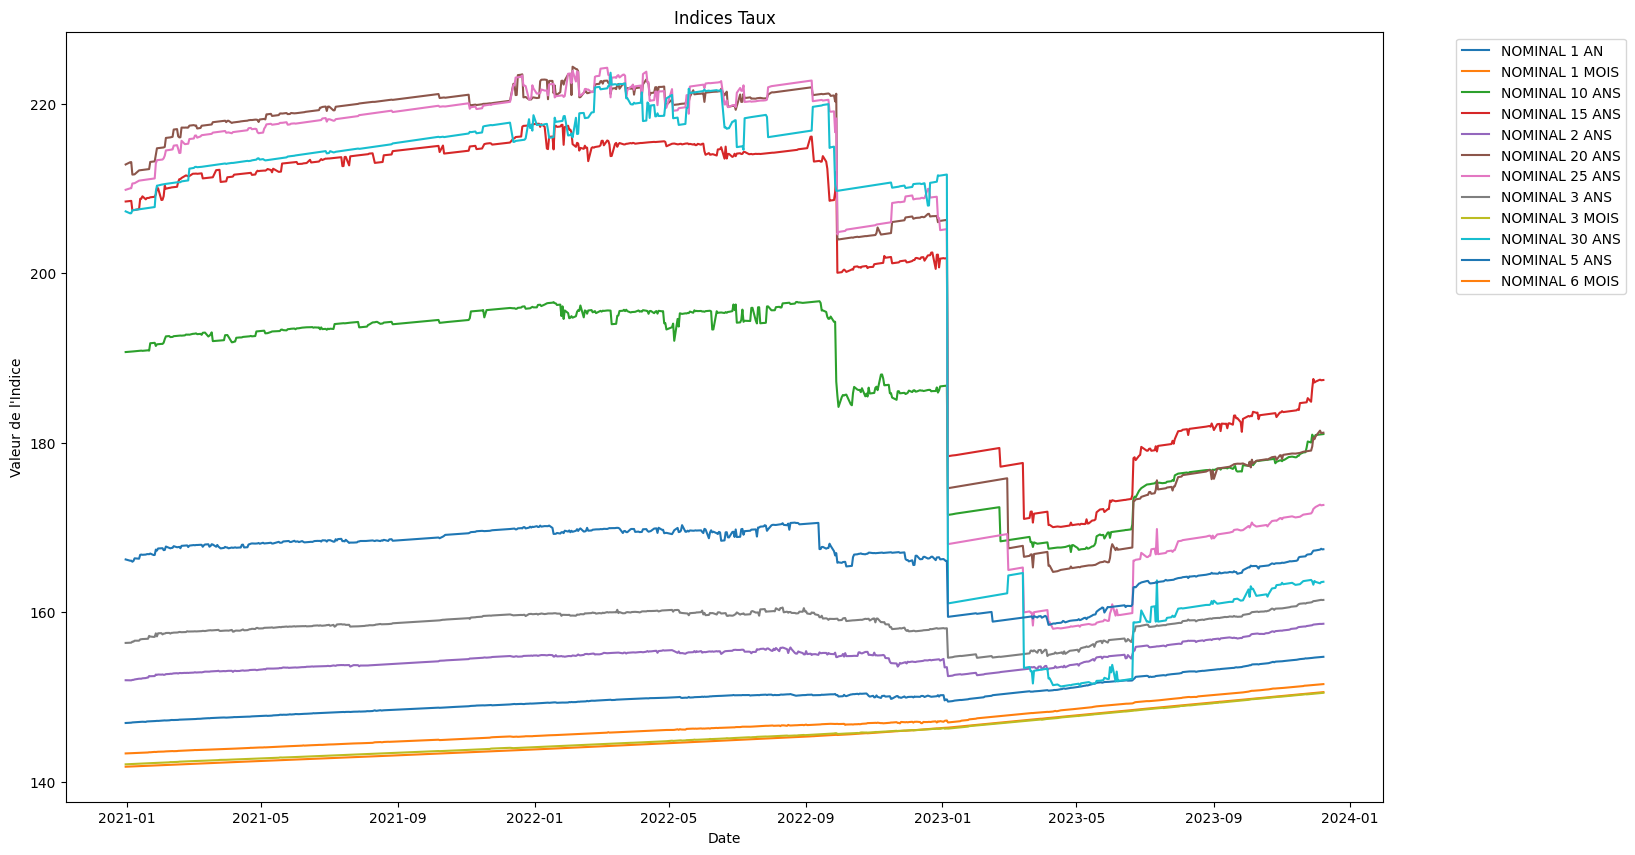

In [35]:
# Sélectionner les colonnes à visualiser
columns_to_plot = sector_taux_sheet.columns[1:]

# Filtrer les données pour chaque catégorie
indices_col = [col for col in columns_to_plot]


# Visualiser les indices
plt.figure(figsize=(17, 10))
for column in indices_col:
    sns.lineplot(x='Étiquettes de lignes', y=column, data=sector_taux_sheet, label=column)

plt.title('Indices Taux')
plt.xlabel('Date')
plt.ylabel('Valeur de l\'Indice')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


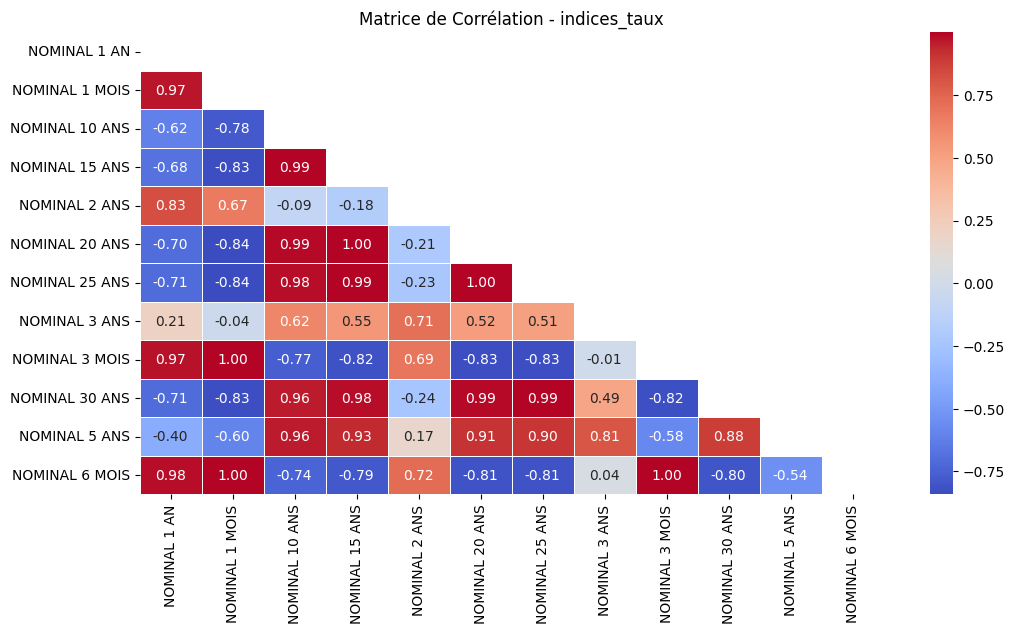

In [36]:
# Calculer la matrice de corrélation
indices_taux_gen = indices_taux.drop(["Étiquettes de lignes"],axis = 1)
correlation_matrix = indices_taux_gen.corr()

# Créer un masque pour la partie inférieure du triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Paramètres de la figure
plt.figure(figsize=(12, 6))

# Créer une heatmap triangulaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=.5)

plt.title('Matrice de Corrélation - indices_taux')
plt.show()

### Exploration de Indices Sectorielles

In [37]:
# Charger la feuille Indices Sectorielles
sector_indices_sheet = xls.parse("Indices Sectorielles")

# Convertir la colonne de date en format datetime
sector_indices_sheet['Étiquettes de lignes'] = pd.to_datetime(sector_indices_sheet['Étiquettes de lignes'])

sector_indices_sheet.describe()

,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,...,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT
count,540.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,326.000000,734.000000,...,734.000000,734.000000,503.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,34084.273548,4857.023167,12900.280973,17824.431569,15310.993511,5679.653896,41747.081759,2341.163493,2638.222272,7112.002283,...,3336.987002,18204.277080,1180.606880,3839.034673,8103.810908,1006.764387,4632.677576,31.583515,1754.762848,2359.350623
std,3396.943811,379.096811,864.096812,2257.213484,1203.787140,1081.485709,4562.964323,170.783814,1741.672768,1549.369420,...,864.087478,2057.785946,158.851019,396.239921,686.981971,65.099431,573.608883,7.542716,300.932911,134.040807
min,13969.669922,4037.669922,10631.299805,12520.940430,12912.080078,3769.370000,30901.400000,1970.949951,897.109985,2966.030000,...,2213.129883,14934.350000,891.669983,2784.620117,6668.729980,896.780000,3090.860107,17.330000,1108.850000,1935.900024
25%,31654.780000,4551.127500,12260.125068,16545.595098,14354.540039,4654.000000,39530.000000,2189.940000,990.784997,6208.877500,...,2611.880000,16349.850176,1075.000000,3384.620000,7513.464985,933.327499,4245.075073,29.515000,1476.692498,2280.420059
50%,34248.830000,4796.824980,12928.485059,17796.059570,15362.209961,5776.825088,42354.085000,2346.370000,1051.960022,7726.380127,...,3261.610107,17618.235313,1108.329956,3969.615000,7967.305000,1023.860000,4786.199971,33.180000,1812.609985,2399.899902
75%,37257.290000,5102.740015,13563.685000,19177.592500,16128.440000,6700.882500,44688.608398,2458.100000,4224.290000,8264.832451,...,3751.382446,19983.740234,1333.330000,4153.850098,8639.914961,1054.425001,5013.370000,36.207500,2040.099976,2456.802500
max,40967.130000,5701.540039,14856.370117,22578.390625,17608.750000,7535.899902,52008.171875,2793.300049,5714.290000,9579.780273,...,6141.100000,23639.050781,1558.130000,4476.919922,9655.130000,1141.939941,6006.940000,46.439999,2184.670000,2567.960000


In [38]:
sector_indices_sheet.shape

(738, 25)

In [39]:
# Sélectionner les colonnes à visualiser
columns_to_plot = sector_indices_sheet.columns[1:]

# Filtrer les données pour chaque catégorie
indices_low = [col for col in columns_to_plot if sector_indices_sheet[col].mean() <= 2000]
indices_mid = [col for col in columns_to_plot if 2000 < sector_indices_sheet[col].mean() < 10000]
indices_high = [col for col in columns_to_plot if sector_indices_sheet[col].mean() >= 10000]

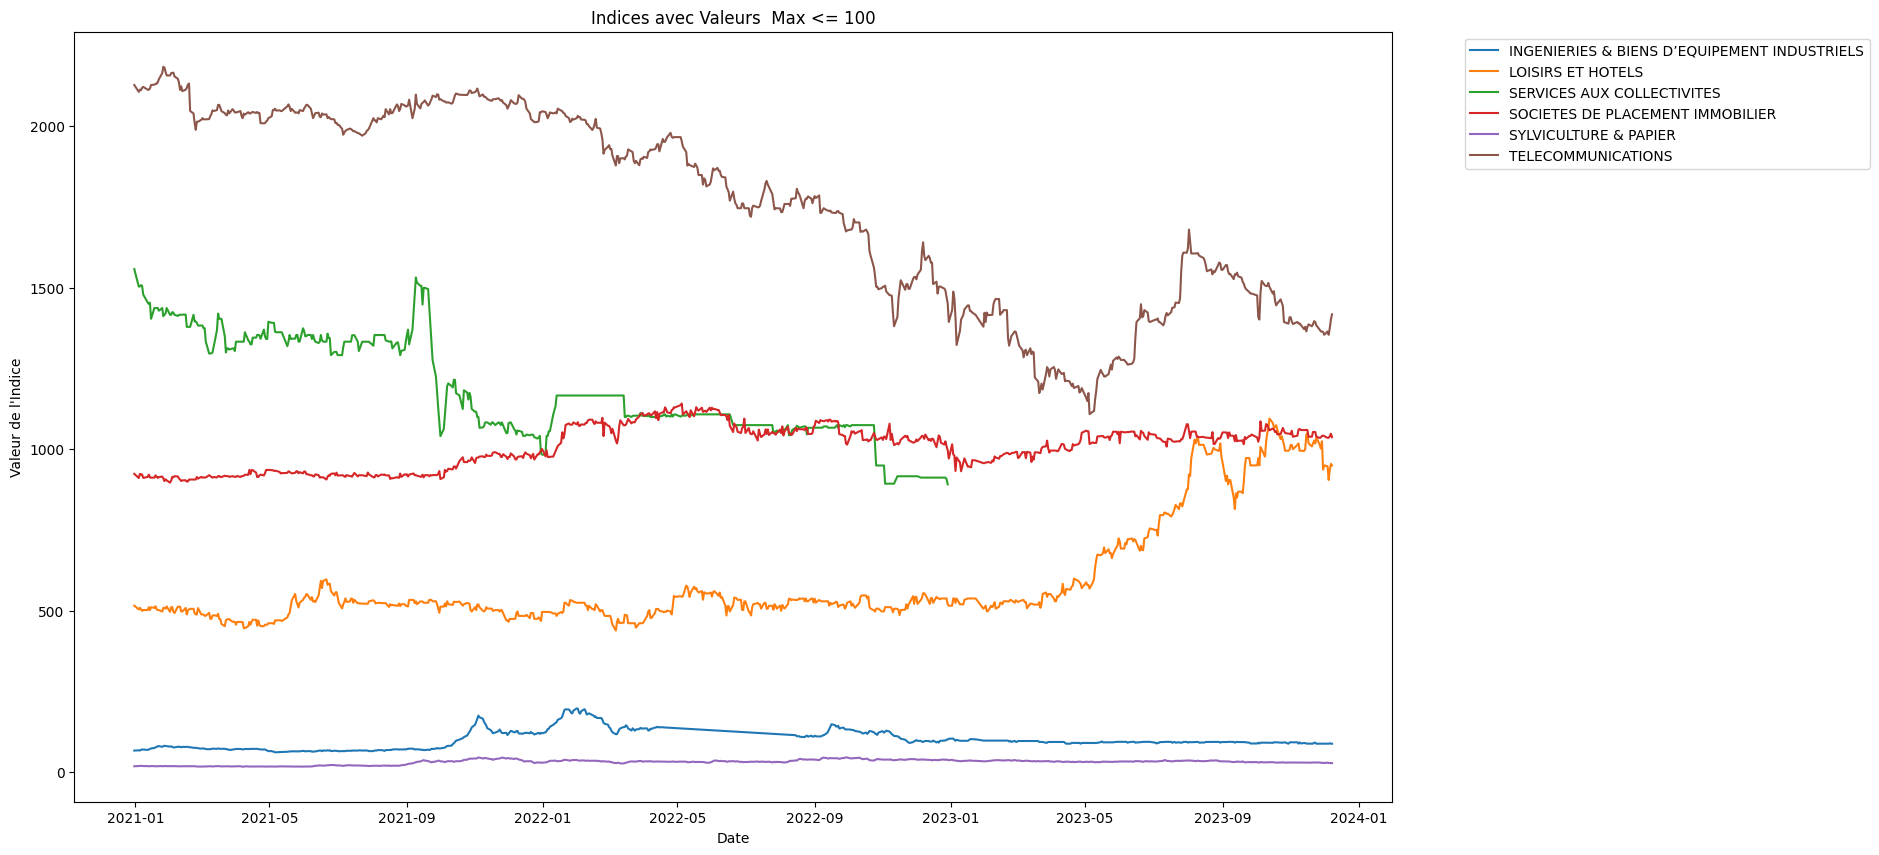

In [40]:
# Visualiser les indices avec max < 2000
plt.figure(figsize=(17, 10))
for column in indices_low:
    sns.lineplot(x='Étiquettes de lignes', y=column, data=sector_indices_sheet, label=column)

plt.title('Indices avec Valeurs  Max <= 100')
plt.xlabel('Date')
plt.ylabel('Valeur de l\'Indice')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

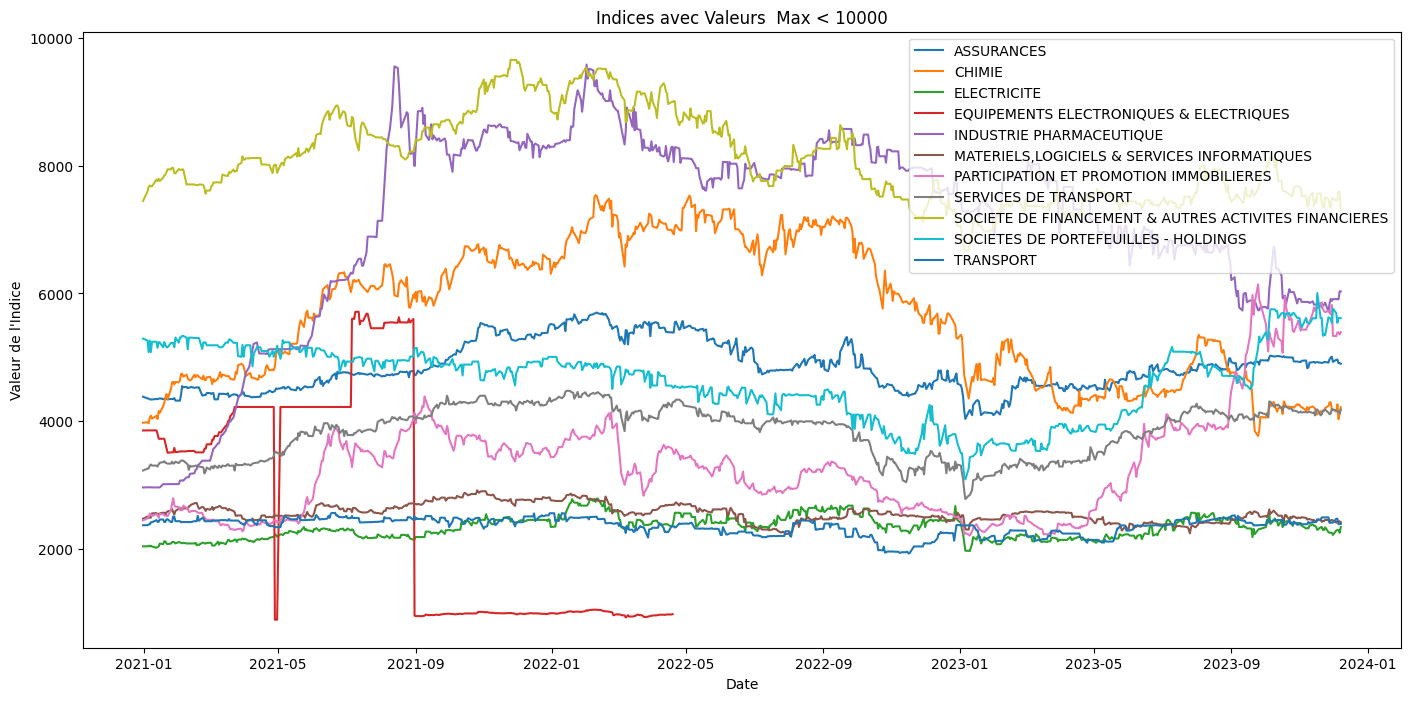

In [41]:
# Visualiser les indices avec max < 10000 and > 2000
plt.figure(figsize=(17, 8))
for column in indices_mid:
    sns.lineplot(x='Étiquettes de lignes', y=column, data=sector_indices_sheet, label=column)

plt.title('Indices avec Valeurs  Max < 10000')
plt.xlabel('Date')
plt.ylabel('Valeur de l\'Indice')
plt.show()

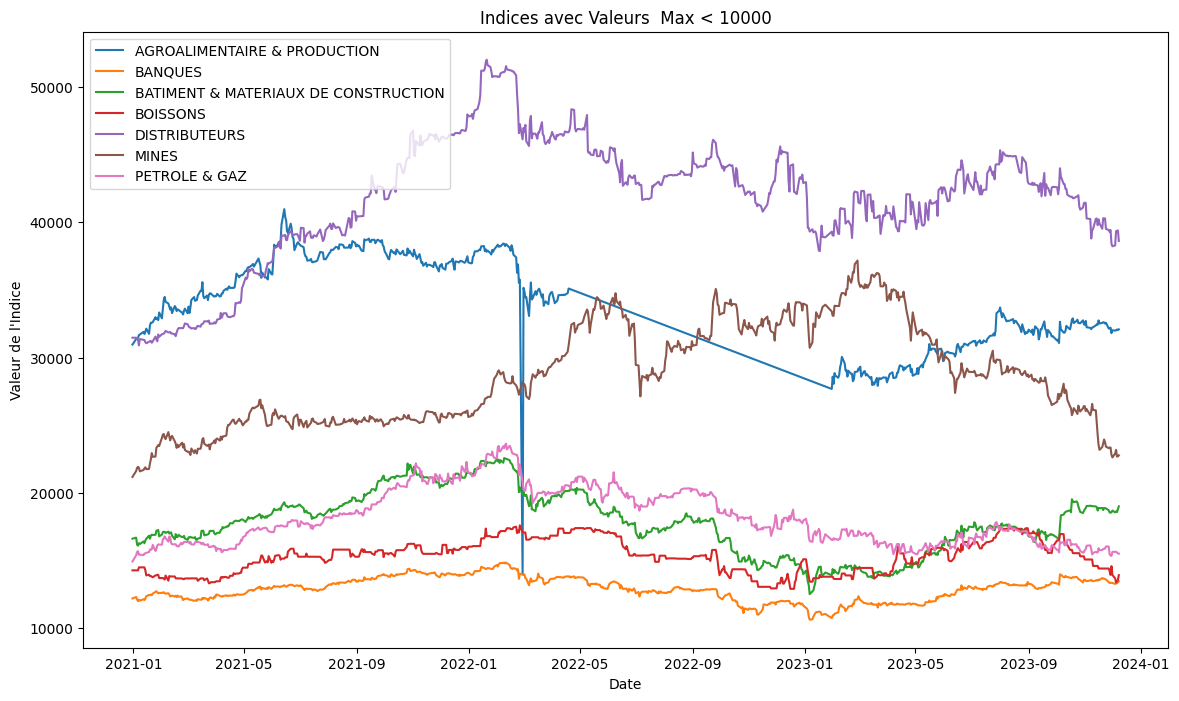

In [42]:
# Visualiser les indices avec max >= 10000
plt.figure(figsize=(14, 8))
for column in indices_high:
    sns.lineplot(x='Étiquettes de lignes', y=column, data=sector_indices_sheet, label=column)

plt.title('Indices avec Valeurs  Max < 10000')
plt.xlabel('Date')
plt.ylabel('Valeur de l\'Indice')
plt.show()

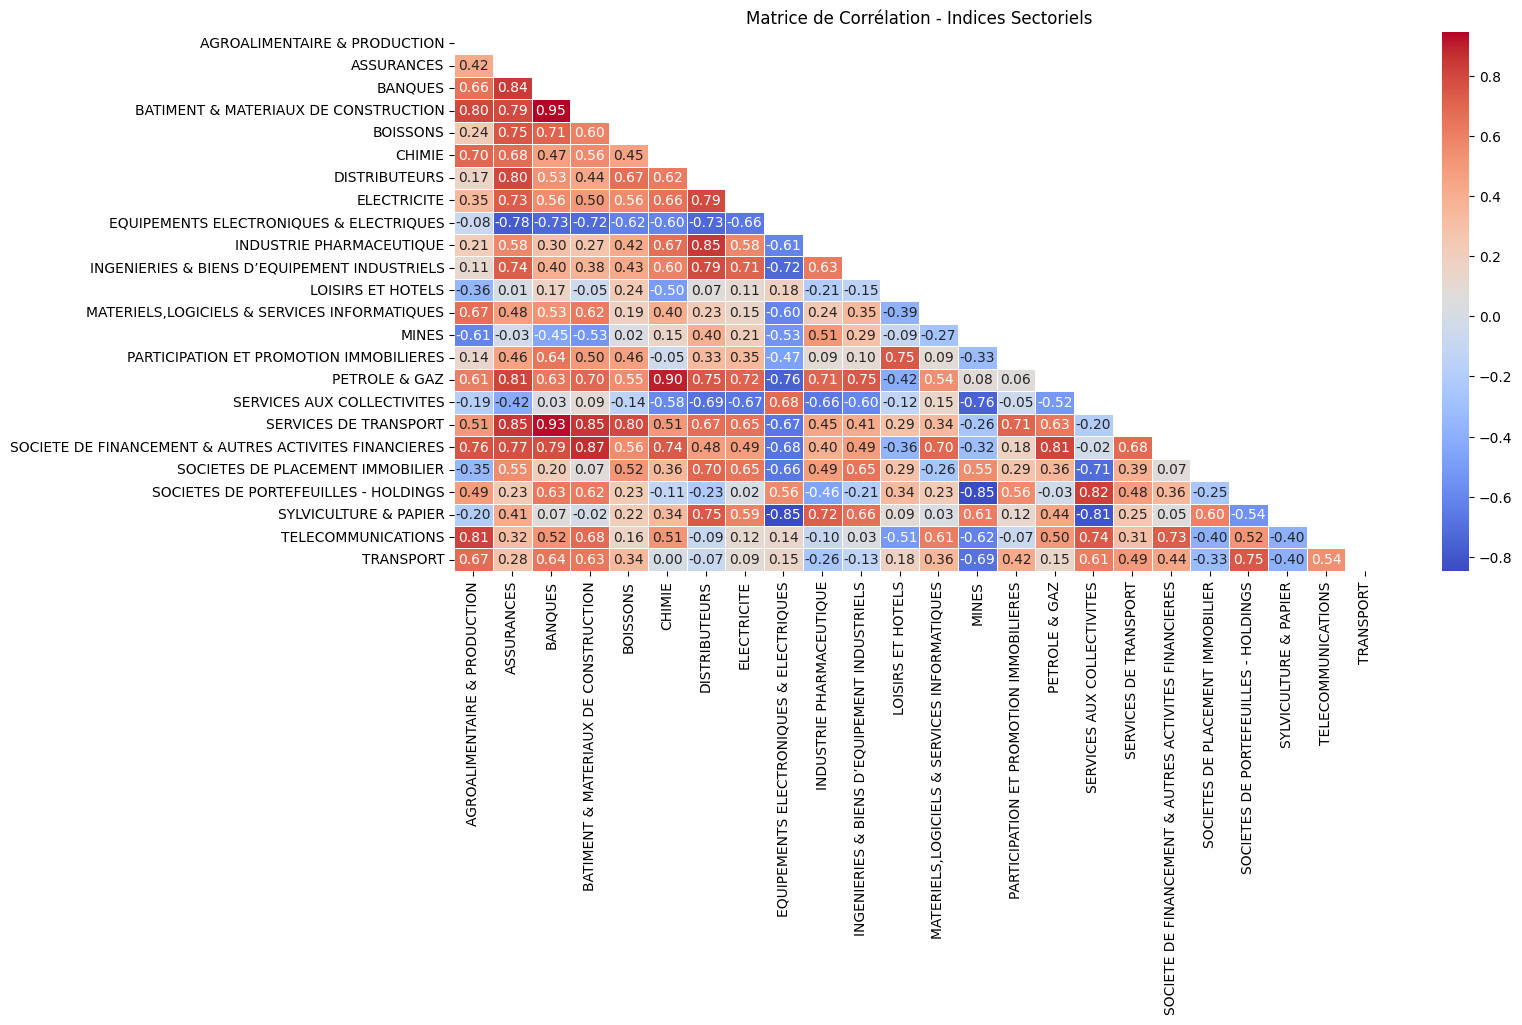

In [43]:
# Calculer la matrice de corrélation
indices_sectoriels_gen = indices_sectoriels.drop(["Étiquettes de lignes"],axis = 1)
correlation_matrix = indices_sectoriels_gen.corr()

# Créer un masque pour la partie inférieure du triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Paramètres de la figure
plt.figure(figsize=(15, 7))

# Créer une heatmap triangulaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=.5)

plt.title('Matrice de Corrélation - Indices Sectoriels')
plt.show()

<a id='4'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>4 |</span></b> <b>Data Preprocessing</b></div>

### Preprocessing de Indices Generaux

In [44]:
# Identifier les valeurs manquantes
print(indices_generaux.isna().sum())

SEANCE             0

INDICE             0

COURS_CLOTURE      0

COURS_PLUS_HAUT    0

COURS_PLUS_BAS     0

COURS_OUVERTURE    0

COURS_VEILLE       0

VARIATION          0

dtype: int64


L'analyse de la corrélation dans la feuille "Indices Généraux" a révélé une forte corrélation entre les différentes mesures de cours, à savoir le COURS_CLOTURE, COURS_PLUS_HAUT, COURS_PLUS_BAS, COURS_OUVERTURE et COURS_VEILLE. Cette corrélation suggère que ces variables fournissent des informations similaires sur la performance de l'indice MASI. Afin de simplifier le modèle, d'éviter la multicollinéarité et de conserver l'essentiel de l'information, nous avons décidé de conserver uniquement la variable COURS_CLOTURE.

In [45]:
# Supprimer les variables fortement corrélées sauf COURS_CLOTURE
indices_generaux_cleaned = indices_generaux.drop(columns=['INDICE','COURS_PLUS_HAUT', 'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE','VARIATION'], axis=1)

# Convertir la colonne de date en format datetime
indices_generaux_cleaned['SEANCE'] = pd.to_datetime(indices_generaux_cleaned['SEANCE'])

# Renommer la colonne 'Seance' en 'DATE'
indices_generaux_cleaned = indices_generaux_cleaned.rename(columns={'SEANCE': 'DATE'})

# Afficher les premières lignes des données après suppression
indices_generaux_cleaned.head()

,DATE,COURS_CLOTURE
0,2023-12-08,11885.32
1,2023-12-07,11827.02
2,2023-12-06,11757.60
3,2023-12-05,11759.51
4,2023-12-04,11728.06


### Preprocessing de Avoirs officiels de réserve

In [46]:
# Identifier les valeurs manquantes
avoirs_officiels.isna().sum()

DATE                           0
AVOIRS_OFFICIELS_DE_RESERVE    0
OR_MONETAIRE                   0
MONNAIES_ETRANGERES            0
DEPOTS_ET_TITRES               0
POSITION_DE_RESERVE_AU_FMI     0
AVOIRS_EN_DTS                  0
dtype: int64

In [47]:
# Supprimer les variables fortement corrélées
avoirs_officiels_cleaned = avoirs_officiels.drop(columns=['DEPOTS_ET_TITRES'], axis=1)

# Convertir la colonne de date en format datetime
avoirs_officiels_cleaned['DATE'] = pd.to_datetime(avoirs_officiels_cleaned['DATE'])


# Afficher les premières lignes des données après suppression
avoirs_officiels_cleaned.head()

,DATE,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS
0,2023-11-24,353.425989,14.340808,10.652710,1.982553,19.688569
1,2023-11-17,354.640840,14.367116,11.156796,1.985926,19.722065
2,2023-11-10,354.343008,14.224199,10.500546,1.985870,19.721509
3,2023-11-03,356.217190,14.495102,10.381617,1.986924,19.992103
4,2023-11-02,354.366401,14.500079,9.561621,1.984031,19.962999


### Preprocessing de CHANGE

In [48]:
# Identifier les valeurs manquantes
change.isna().sum()

DATE_D'EXTRACTION    0
Date                 0
Heure                0
Devises              0
Cours Minimum        0
Cours Maximum        0
dtype: int64

In [49]:
# Remove unnecessary columns from the DataFrame
change_cleaned = change.drop(columns=["DATE_D'EXTRACTION","Heure","Devises"], axis=1)

# Convertir la colonne de date en format datetime
change_cleaned['Date'] = pd.to_datetime(change_cleaned['Date'])

# Renommer les colonnes
change_cleaned = change_cleaned.rename(columns={'Date': 'DATE','Cours Minimum': 'Change_Minimum','Cours Maximum': 'Change_Maximum'})

# Afficher les premières lignes des données après suppression
change_cleaned.tail()

,DATE,Change_Minimum,Change_Maximum
995,2021-12-24,9.1776,10.1436
996,2021-12-23,9.1793,10.1456
997,2021-12-23,9.1821,10.1486
998,2021-12-22,9.2136,10.1834
999,2021-12-22,9.1991,10.1674


### Preprocessing de monia

In [50]:
monia.head(3)

,Date de référence,Indice MONIA,Volume JJ
0,2023-12-06,2.936,10072
1,2023-12-05,2.969,7015
2,2023-12-04,2.955,9010


In [51]:
# Identifier les valeurs manquantes
monia.isna().sum()

Date de référence    0
Indice MONIA         0
Volume JJ            0
dtype: int64

In [52]:
# Renommer les colonnes
monia_cleaned = monia.rename(columns={'Date de référence': 'DATE','Indice MONIA': 'val_Indice_MONIA','Volume JJ': 'vol_Volume_JJ'})

# Afficher les premières lignes des données après suppression
monia_cleaned.tail()

,DATE,val_Indice_MONIA,vol_Volume_JJ
980,2020-01-07,2.172,6809
981,2020-01-06,2.193,9050
982,2020-01-03,2.183,8632
983,2020-01-02,2.197,7770
984,2019-12-31,2.223,10343


### Preprocessing de TMP

In [53]:
tmp.isna().sum()

SEANCE                 0
TAUX MOYEN PONDERE     0
VOLUME JJ             69
ENCOURS                0
dtype: int64

In [54]:
# Remove unnecessary columns from the DataFrame
tmp_cleaned = tmp.drop(columns=['VOLUME JJ','ENCOURS'], axis=1)

# Renommer les colonnes
tmp_cleaned = tmp_cleaned.rename(columns={'SEANCE': 'DATE','TAUX MOYEN PONDERE': 'TMP'})

# Afficher les premières lignes des données après suppression
tmp_cleaned.tail()

,DATE,TMP
958,2021-01-05,1.5
959,2021-01-04,1.5
960,2021-01-03,1.5
961,2021-01-02,1.5
962,2021-01-01,1.5


### Preprocessing de Inlfation

In [55]:
inlfation.isna().sum()

MOIS                      0
INFLATION                 0
INFLATION_SOUS_JACENTE    0
dtype: int64

In [56]:
# Remove unnecessary columns from the DataFrame
inlfation_cleaned = inlfation.drop(columns=['INFLATION_SOUS_JACENTE'], axis=1)

# Renommer les colonnes
inlfation_cleaned = inlfation_cleaned.rename(columns={'MOIS': 'DATE'})

# Afficher les premières lignes des données après suppression
inlfation_cleaned.tail()

,DATE,INFLATION
16,2022-05-01,5.859750
17,2022-04-01,5.876686
18,2022-03-01,5.263158
19,2022-02-01,3.613281
20,2022-01-01,3.100000


### Preprocessing de Indices Taux

In [57]:
indices_taux.isna().sum()

Étiquettes de lignes    0
NOMINAL 1 AN            0
NOMINAL 1 MOIS          0
NOMINAL 10 ANS          0
NOMINAL 15 ANS          0
NOMINAL 2 ANS           0
NOMINAL 20 ANS          0
NOMINAL 25 ANS          0
NOMINAL 3 ANS           0
NOMINAL 3 MOIS          0
NOMINAL 30 ANS          0
NOMINAL 5 ANS           0
NOMINAL 6 MOIS          0
dtype: int64

In [58]:
# Remove unnecessary columns from the DataFrame
indices_taux_cleaned = indices_taux[["Étiquettes de lignes",'NOMINAL 1 AN','NOMINAL 2 ANS','NOMINAL 3 ANS','NOMINAL 10 ANS','NOMINAL 20 ANS']]

# Renommer les colonnes
indices_taux_cleaned = indices_taux_cleaned.rename(columns={'Étiquettes de lignes': 'DATE'})

# Afficher les premières lignes des données après suppression
indices_taux_cleaned.head()

,DATE,NOMINAL 1 AN,NOMINAL 2 ANS,NOMINAL 3 ANS,NOMINAL 10 ANS,NOMINAL 20 ANS
0,2020-12-31,146.923866,151.969539,156.371593,190.693865,212.829788
1,2021-01-04,146.954357,151.949788,156.393177,190.731382,213.091574
2,2021-01-05,146.960785,151.957406,156.401461,190.743671,213.108447
3,2021-01-06,146.990244,152.004977,156.524217,190.758898,211.633170
4,2021-01-07,146.998817,152.012542,156.520202,190.772325,211.650192


### Preprocessing de Indices Sectoriels

In [82]:
# Remove unnecessary columns from the DataFrame
indices_sectoriels_cleaned = indices_sectoriels.drop(columns=['AGROALIMENTAIRE & PRODUCTION','INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS','SERVICES DE TRANSPORT','BATIMENT & MATERIAUX DE CONSTRUCTION','SERVICES AUX COLLECTIVITES','ASSURANCES','EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES'], axis=1)

# Renommer les colonnes
indices_sectoriels_cleaned = indices_sectoriels_cleaned.rename(columns={'Étiquettes de lignes': 'DATE'})

# Afficher les premières lignes des données après suppression
indices_sectoriels_cleaned.head()

,DATE,BANQUES,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,INDUSTRIE PHARMACEUTIQUE,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT
0,2020-12-31,12207.24,14278.10,3977.56,31466.88,2044.69,2966.03,515.92,2476.69,21182.90,2450.50,14934.35,7446.94,924.02,5292.90,18.70,2128.17,2375.80
1,2021-01-04,12307.00,14278.10,3985.56,31466.63,2044.69,2968.46,504.38,2510.19,21618.15,2482.15,15389.46,7593.53,911.26,5262.78,19.42,2106.88,2375.80
2,2021-01-05,12130.07,14278.10,3969.16,31426.86,2053.63,2968.46,509.36,2492.29,21848.05,2500.36,15637.88,7665.01,923.97,5082.04,19.81,2113.49,2388.38
3,2021-01-06,12005.83,14278.10,4057.57,31327.99,2044.69,2968.46,504.60,2491.65,21929.61,2558.38,15688.17,7688.36,922.64,5262.78,20.03,2112.02,2388.38
4,2021-01-07,12118.76,14498.94,4088.77,30901.40,2053.63,2968.46,500.08,2495.75,21858.06,2544.30,15424.61,7675.62,921.80,5083.55,20.02,2119.36,2421.47


In [83]:
indices_sectoriels_cleaned = indices_sectoriels_cleaned.dropna()
indices_sectoriels_cleaned.isna().sum()

DATE                                                     0
BANQUES                                                  0
BOISSONS                                                 0
CHIMIE                                                   0
DISTRIBUTEURS                                            0
ELECTRICITE                                              0
INDUSTRIE PHARMACEUTIQUE                                 0
LOISIRS ET HOTELS                                        0
MATERIELS,LOGICIELS & SERVICES INFORMATIQUES             0
MINES                                                    0
PARTICIPATION ET PROMOTION IMMOBILIERES                  0
PETROLE & GAZ                                            0
SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES    0
SOCIETES DE PLACEMENT IMMOBILIER                         0
SOCIETES DE PORTEFEUILLES - HOLDINGS                     0
SYLVICULTURE & PAPIER                                    0
TELECOMMUNICATIONS                                      

.

## Fusion des Données pour Modélisation Exogène

Pour la modélisation exogène, nous avons fusionné les différentes feuilles de données en utilisant la méthode merge_asof de Pandas, en se basant sur la variable temporelle (DATE).

In [543]:
df1 = indices_generaux_cleaned[['DATE','COURS_CLOTURE']].sort_values(by='DATE', ascending=True)
df2 = avoirs_officiels_cleaned.sort_values(by='DATE', ascending=True)
df3 = change_cleaned.sort_values(by='DATE', ascending=True)
df4 = monia_cleaned.sort_values(by='DATE', ascending=True)
df5 = tmp_cleaned.sort_values(by='DATE', ascending=True)
df6 = inlfation_cleaned.sort_values(by='DATE', ascending=True)
df7 = indices_taux_cleaned
df8 = indices_sectoriels_cleaned

In [544]:
df1 = df1[df1['DATE'].dt.year >= 2021]
df2 = df2[df2['DATE'].dt.year >= 2021]
df3 = df3[df3['DATE'].dt.year >= 2021]
df4 = df4[df4['DATE'].dt.year >= 2021]
df5 = df5[df5['DATE'].dt.year >= 2021]
df7 = df7[df7['DATE'].dt.year >= 2021]
df8 = df8[df8['DATE'].dt.year >= 2021]

In [545]:
# Merge multiple DataFrames using pd.merge_asof sequentially.
def merge_asof_multiple(dfs, on_column='DATE'):

    merged_data = pd.merge_asof(dfs[0], dfs[1], on=on_column)
    for df in dfs[2:]:
        merged_data = pd.merge_asof(merged_data, df, on=on_column)
    return merged_data


# Assume dfs_list is a list containing df1, df2, df4, df5, df6, df7, df8
dfs_list = [df1, df2, df4, df5, df6, df7, df8]

merge_data = merge_asof_multiple(dfs_list)

In [546]:
pd.DataFrame(merge_data.isna().sum(),columns=['Nombre de valeurs manquantes'])

,Nombre de valeurs manquentes
DATE,0
COURS_CLOTURE,0
AVOIRS_OFFICIELS_DE_RESERVE,4
OR_MONETAIRE,4
MONNAIES_ETRANGERES,4
POSITION_DE_RESERVE_AU_FMI,4
AVOIRS_EN_DTS,4
val_Indice_MONIA,0
vol_Volume_JJ,0
TMP,0


In [547]:
merge_data.shape

(611, 33)

In [548]:
merge_data.INFLATION = merge_data.INFLATION.fillna(1.4)
merge_data.AVOIRS_OFFICIELS_DE_RESERVE = merge_data.AVOIRS_OFFICIELS_DE_RESERVE.fillna(merge_data.AVOIRS_OFFICIELS_DE_RESERVE.mean())
merge_data.OR_MONETAIRE = merge_data.OR_MONETAIRE.fillna(merge_data.OR_MONETAIRE.mean())
merge_data.MONNAIES_ETRANGERES = merge_data.MONNAIES_ETRANGERES.fillna(merge_data.MONNAIES_ETRANGERES.mean())
merge_data.POSITION_DE_RESERVE_AU_FMI = merge_data.POSITION_DE_RESERVE_AU_FMI.fillna(merge_data.POSITION_DE_RESERVE_AU_FMI.mean())
merge_data.AVOIRS_EN_DTS = merge_data.AVOIRS_EN_DTS.fillna(merge_data.AVOIRS_EN_DTS.mean())

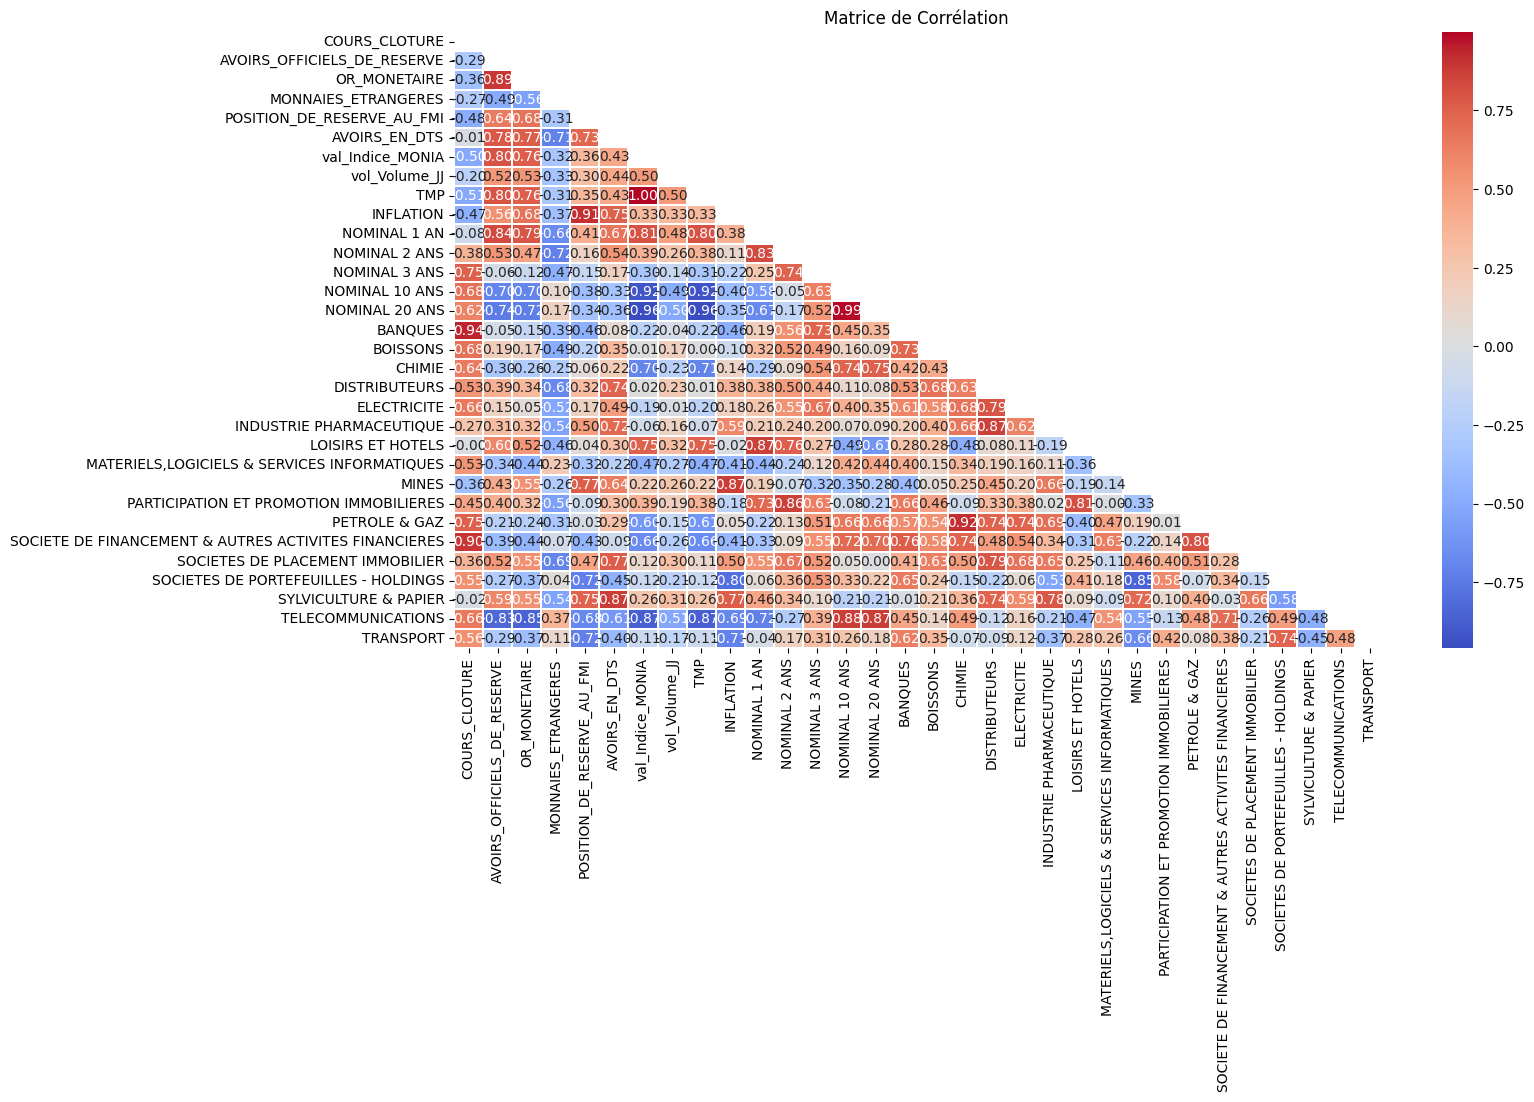

In [549]:
# Calculer la matrice de corrélation
gen = merge_data.drop(["DATE"],axis = 1)
correlation_matrix = gen.corr()

# Créer un masque pour la partie inférieure du triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Paramètres de la figure
plt.figure(figsize=(15, 8))

# Créer une heatmap triangulaire
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=.3)

plt.title('Matrice de Corrélation ')
plt.show()

In [550]:
merge_data = merge_data.drop(['val_Indice_MONIA','NOMINAL 10 ANS','NOMINAL 20 ANS','CHIMIE'],axis = 1)
merge_data.shape

(611, 29)

In [551]:
# TEST = data_124578.sort_values(by='DATE', ascending=True).copy()
merge_data = merge_data.set_index('DATE')
merge_data['day'] = merge_data.index.day
merge_data['month'] = merge_data.index.month
merge_data['year'] = merge_data.index.year
merge_data['is_month_start'] = merge_data.index.is_month_start.astype(int)
merge_data['is_month_end'] = merge_data.index.is_month_end.astype(int)

merge_data.head()

,COURS_CLOTURE,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,vol_Volume_JJ,TMP,INFLATION,NOMINAL 1 AN,...,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,day,month,year,is_month_start,is_month_end
DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-04,11340.860352,334.560591,13.044301,18.354499,1.975597,17.608626,6515,1.5,1.4,146.954357,...,911.26,5262.78,19.42,2106.88,2375.80,4,1,2021,0,0
2021-01-05,11253.700195,334.560591,13.044301,18.354499,1.975597,17.608626,10064,1.5,1.4,146.960785,...,923.97,5082.04,19.81,2113.49,2388.38,5,1,2021,0,0
2021-01-06,11215.709961,334.560591,13.044301,18.354499,1.975597,17.608626,7919,1.5,1.4,146.990244,...,922.64,5262.78,20.03,2112.02,2388.38,6,1,2021,0,0
2021-01-07,11271.230469,334.560591,13.044301,18.354499,1.975597,17.608626,9170,1.5,1.4,146.998817,...,921.80,5083.55,20.02,2119.36,2421.47,7,1,2021,0,0
2021-01-08,11249.139648,308.803460,11.854330,26.746630,1.877020,8.197340,8214,1.5,1.4,147.001628,...,911.58,5244.71,19.33,2122.30,2421.47,8,1,2021,0,0


In [552]:
X = merge_data.drop(['COURS_CLOTURE'], axis=1) # Features
data_y = merge_data['COURS_CLOTURE']
y = merge_data['COURS_CLOTURE']
min,max = y.min(),y.max()
y = (y-min)/(max - min)

scaler = MinMaxScaler(feature_range=(0, 1))
X_ex = scaler.fit_transform(X)

X_train_ex = X_ex[:507]
X_test_ex = X_ex[507:]
y_train_ex = y[:507]
y_test_ex = data_y[507:]

.

## Préparation des Données pour la Modélisation de  Série Temporelle


In [448]:
data = indices_generaux_cleaned.copy()
data = data.sort_values(by='DATE', ascending=True)
data = data.set_index('DATE')


dataset = data.values

# Get NO. of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .90))

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)


train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 7:, :]


# Split into x_train and y_train
x_train_st = []
y_train_st = []
x_test_st = []
y_test_st = []

# Isolate the "x_train" which is input data and "y_train" which is the output/target data.
for i in range (7, len(train_data)):
    x_train_st.append(train_data[i-7:i, 0])
    y_train_st.append(train_data[i, 0])

for i in range(7, len(test_data)):
    x_test_st.append(test_data[i-7:i, 0])
    #y_test_st.append(test_data[i, 0])

In [449]:
# Convert data to np array
x_train_st = np.array(x_train_st)
y_train_st = np.array(y_train_st)
x_test_st = np.array(x_test_st)
y_test_st = dataset[training_data_len: ,:]

.

<a id='4'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>5 |</span></b> <b> Modélisation de Série Temporelle </b></div>

In [486]:
Resultat_RMSE_ST = {}
predictions_st = pd.DataFrame(data[training_data_len:])

### XGBoost

In [451]:
model = xgb.XGBRegressor()
model.fit(x_train_st, y_train_st)

# Prédictions
XGB_pred =  model.predict(x_test_st)
XGB_pred = [[i] for i in list(XGB_pred)]
XGB_pred = scaler.inverse_transform(np.array(XGB_pred)) # Scaler transofmations so we can plot


# Évaluation du modèle (par exemple, calcul de l'erreur quadratique moyenne)
rmse_xgb_st = mean_squared_error(y_test_st, XGB_pred, squared=False)
print("Root Mean Squared Error: ", rmse_xgb_st)

Root Mean Squared Error:  92.44743210316852


### Optimisation de Modèle 

In [243]:
# Définir la grille de paramètres à rechercher
param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 300, 400]
}

# Initialiser le XGBRegressor
xgb_model = xgb.XGBRegressor()

# Utiliser GridSearchCV pour rechercher les meilleurs paramètres
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train_st, y_train_st)

# Afficher les meilleurs paramètres
print(grid_search.best_params_)

#Utiliser le modèle avec les meilleurs paramètres
best_xgb_model = grid_search.best_estimator_


# Prédictions
XGB_pred =  best_xgb_model.predict(x_test_st)
XGB_pred = [[i] for i in list(XGB_pred)]
XGB_pred = scaler.inverse_transform(np.array(XGB_pred)) # Scaler transofmations so we can plot


# Évaluation du modèle (par exemple, calcul de l'erreur quadratique moyenne)
rmse_xgb_st = mean_squared_error(y_test_st, XGB_pred, squared=False)
print("Root Mean Squared Error: ", rmse_xgb_st)

Fitting 5 folds for each of 27 candidates, totalling 135 fits

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Root Mean Squared Error:  87.98712043104719


In [487]:
Resultat_RMSE_ST['rmse_xgb'] = rmse_xgb_st
predictions_st['XGB_pred'] = XGB_pred

## RandomForest Regressor

In [453]:
# Définir la grille de paramètres à rechercher

RF = RandomForestRegressor()
RF.fit(x_train_st, y_train_st)

# Prédictions
RF_pred =  RF.predict(x_test_st)
RF_pred = [[i] for i in list(RF_pred)]
RF_pred = scaler.inverse_transform(np.array(RF_pred)) # Scaler transofmations so we can plot


# Évaluation du modèle (par exemple, calcul de l'erreur quadratique moyenne)
rmse_RF_st = mean_squared_error(y_test_st, RF_pred, squared=False)
print("Root Mean Squared Error: ", rmse_RF_st)

Root Mean Squared Error:  89.45864705918622


### Optimisation de Modèle RF

In [454]:
# Define the RandomForestRegressor
RF = RandomForestRegressor(random_state=0)

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_st, y_train_st)

# Get the best model from the grid search
best_RF_model = grid_search.best_estimator_

# Make predictions on the test set
RF_pred = best_RF_model.predict(x_test_st)
RF_pred = scaler.inverse_transform(np.array([[i] for i in RF_pred]))  # Transformations for plotting


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print()

# Evaluate the model
rmse_RF_st = mean_squared_error(y_test_st, RF_pred, squared=False)
print("Root Mean Squared Error: ", rmse_RF_st)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}



Root Mean Squared Error:  87.99820532299782


In [488]:
Resultat_RMSE_ST['rmse_rf'] = rmse_RF_st
predictions_st['RF_pred'] = RF_pred

## Resultat

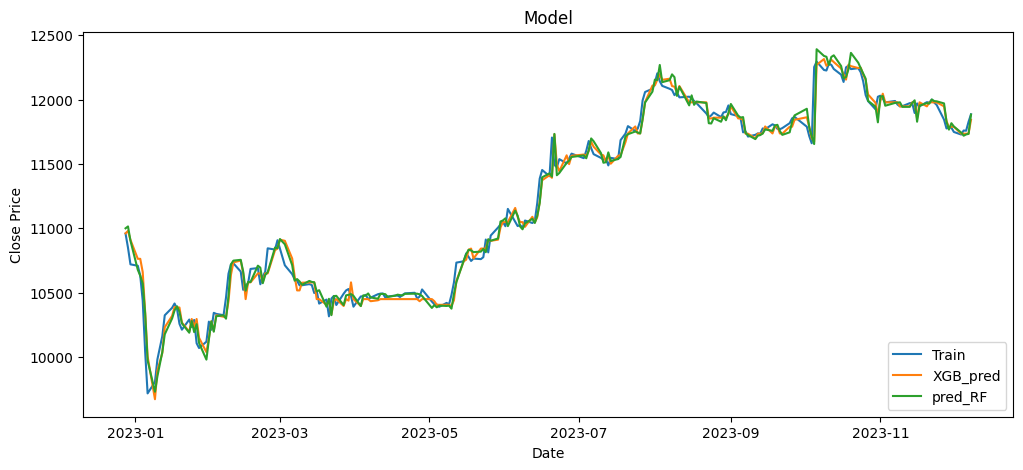

In [180]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['pred_RF'] = RF_pred
valid['XGB_pred'] = XGB_pred

# visualize data
plt.figure(figsize = (12, 5))
plt.title("Model")
plt.xlabel("Date", fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)

#plt.plot(train['COURS_CLOTURE'])
plt.plot(valid[["COURS_CLOTURE", "XGB_pred","pred_RF"]])
plt.legend(["Train", "XGB_pred", "pred_RF"], loc = "lower right")
plt.show()

# Approche Statistique

.

(2355, 1)


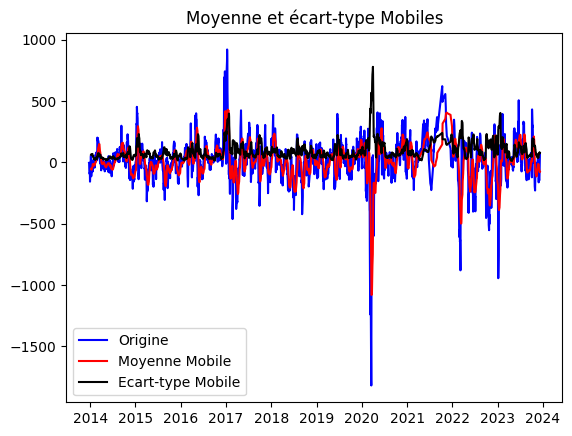

Statistiques ADF : -9.758105634726261

p-value : 7.692141963652814e-17

Valeurs Critiques :

	1%: -3.433146448071043

	5%: -2.8627754190239156

	10%: -2.5674276676268972


In [422]:
def get_stationarity(timeseries):

    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # tracé statistiques mobiles
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)

    # Test Dickey–Fuller :
    result = adfuller(timeseries['COURS_CLOTURE'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

#df_lo
aa = pd.DataFrame(data.COURS_CLOTURE)
rolling_mean = aa.rolling(window=12).mean()
df_log_minus_mean = aa - rolling_mean
df_log_minus_mean.dropna(inplace=True)

print(df_log_minus_mean.shape)
get_stationarity(df_log_minus_mean)

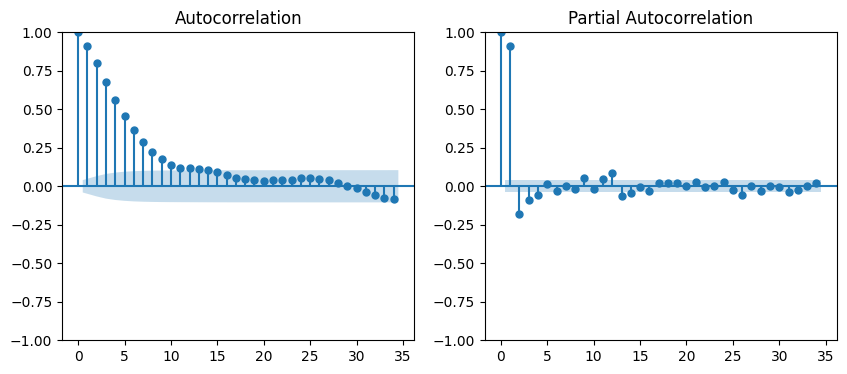

In [423]:
def acf_pacf_plot(y, lags=None, title='', fig_size=(10,4)):
    # initialisation de la figure et des axes
    fig = plt.figure(figsize=fig_size)
    acf_ax = fig.add_subplot(121)
    pacf_ax = fig.add_subplot(122)
    # ACF et PACF
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05, method='ywm')

acf_pacf_plot(df_log_minus_mean)

In [503]:
# Assuming 'aa' is your time series data

# Split the data into train and test sets
train, test = df_log_minus_mean[:2123], df_log_minus_mean[2123:]

# Convert your data to a pandas Series (if it's not already)

# Fit ARIMA model
order = (4, 0, 3)
model = ARIMA(train, order=order)
fitted_model = model.fit()

print(fitted_model.summary())

                               SARIMAX Results                                


Dep. Variable:          COURS_CLOTURE   No. Observations:                 2123

Model:                 ARIMA(4, 0, 3)   Log Likelihood              -12040.275

Date:                Sun, 17 Dec 2023   AIC                          24098.550

Time:                        18:47:18   BIC                          24149.495

Sample:                             0   HQIC                         24117.200

                               - 2123                                         

Covariance Type:                  opg                                         


                 coef    std err          z      P>|z|      [0.025      0.975]

------------------------------------------------------------------------------

const          3.9876     14.647      0.272      0.785     -24.720      32.696

ar.L1          0.1171      0.169      0.693      0.488      -0.214       0.448

ar.L2          0.9491      0.161      

In [505]:
# Forecast on the test set
predictions_arima = fitted_model.forecast(steps=236)

# Evaluate the model (calculate Root Mean Squared Error)
rmse_arima_pred = mean_squared_error(test, predictions_arima[:232], squared=False)
print("Root Mean Squared Error (ARIMA):", rmse_arima_pred)

Root Mean Squared Error (ARIMA): 165.04717926836122


In [471]:
train, test = aa[:2123], aa[2123:]

# Convert your data to a pandas Series (if it's not already)

# Fit ARIMA model
order = (7, 0, 3)
model = ARIMA(train, order=order)
fitted_model = model.fit()


# Forecast on the test set
predictions_arima = fitted_model.forecast(steps=236)

# Evaluate the model (calculate Root Mean Squared Error)
rmse_arima = mean_squared_error(test[:236], predictions_arima, squared=False)
print("Root Mean Squared Error (ARIMA):", rmse_arima_pred)

Root Mean Squared Error (ARIMA): 165.04717926836122


In [489]:
Resultat_RMSE_ST['rmse_arima'] = rmse_arima_pred
predictions_st['predictions_arima'] = np.array(predictions_arima)

## LSTM

In [183]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras

In [251]:
# Reshape data
x_train_st = np.reshape(x_train_st, (x_train_st.shape[0], x_train_st.shape[1], 1))
x_test_st = np.reshape(x_test_st, (x_test_st.shape[0], x_test_st.shape[1], 1))
print(x_train_st.shape,x_test_st.shape) # Testing (ignore)

(2123, 7, 1) (236, 7, 1)


In [252]:
# Delete previous models
if 'model' in globals():
    del model

# Build model
model = Sequential()

# Adding layers
model.add(LSTM(50, return_sequences = True, input_shape = (x_train_st.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))

# Adding Dense Layer
model.add(Dense(25))

# Adding dense layer
model.add(Dense(1))

# Compile model
optimizer = Adam(learning_rate=0.01)
model.compile(loss="mean_squared_error", optimizer=optimizer)

#model.compile(optimizer = "adam", loss = "mean_squared_error")

# Train model
history = model.fit(x_train_st, y_train_st, batch_size = 64,validation_split=0.1, epochs = 50)

Epoch 1/50

30/30 [==============================] - 9s 56ms/step - loss: 0.0141 - val_loss: 0.0020

Epoch 2/50

30/30 [==============================] - 0s 14ms/step - loss: 0.0010 - val_loss: 0.0013

Epoch 3/50

30/30 [==============================] - 0s 13ms/step - loss: 7.3795e-04 - val_loss: 0.0012

Epoch 4/50

30/30 [==============================] - 0s 17ms/step - loss: 7.5283e-04 - val_loss: 0.0014

Epoch 5/50

30/30 [==============================] - 1s 19ms/step - loss: 6.8430e-04 - val_loss: 0.0012

Epoch 6/50

30/30 [==============================] - 1s 18ms/step - loss: 6.5102e-04 - val_loss: 0.0013

Epoch 7/50

30/30 [==============================] - 0s 16ms/step - loss: 6.5171e-04 - val_loss: 0.0017

Epoch 8/50

30/30 [==============================] - 0s 15ms/step - loss: 5.6910e-04 - val_loss: 7.5790e-04

Epoch 9/50

30/30 [==============================] - 0s 12ms/step - loss: 5.2091e-04 - val_loss: 7.7246e-04

Epoch 10/50

30/30 [==============================] - 0

In [253]:
model.summary()

Model: "sequential_9"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 lstm_15 (LSTM)              (None, 7, 50)             10400     

                                                                 

 lstm_16 (LSTM)              (None, 50)                20200     

                                                                 

 dense_16 (Dense)            (None, 25)                1275      

                                                                 

 dense_17 (Dense)            (None, 1)                 26        

                                                                 


Total params: 31901 (124.61 KB)

Trainable params: 31901 (124.61 KB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________


In [254]:
predictions_lstm = model.predict(x_test_st)
predictions_lstm = scaler.inverse_transform(predictions_lstm) # Scaler transofmations so we can plot


# Évaluation du modèle (par exemple, calcul de l'erreur quadratique moyenne)
rmse_lstm_st = mean_squared_error(y_test_st, predictions, squared=False)
print("Root Mean Squared Error: ", rmse_lstm_st)
#rmse = np.sqrt(np.mean((predictions - y_test) ** 2)) # We calculated the RMSE using the formula

8/8 [==============================] - 1s 3ms/step

Root Mean Squared Error:  86.60104922634739


In [491]:
Resultat_RMSE_ST['rmse_lstm'] = rmse_lstm_st
predictions_st['predictions_lstm'] = predictions_lstm

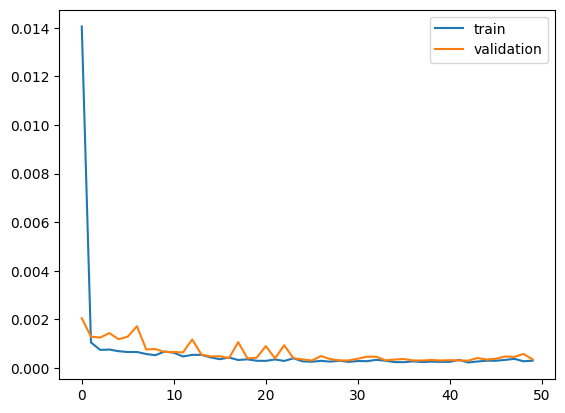

In [256]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

.

<a id='6'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>6|</span></b> <b> Modélisation avec Variables Exogènes  : </b></div>

In [528]:
Resultat_RMSE_EX = {}
predictions_EX = pd.DataFrame()
predictions_EX['Data_Test'] = y_test_ex
Y_Train = np.array(y_train_ex)

## XGB

In [515]:
# rf = RandomForestRegressor(n_estimators=100, random_state=0)
# rf.fit(X_train, y_train)

param_grid = {
    'max_depth': [2, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [500, 600, 700]
}

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor()


# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_ex, Y_Train)

# Display the best parameters
print(grid_search.best_params_)

# Use the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_xgb_ex = best_xgb_model.predict(X_test_ex)

# Transform predictions back to the original scale
y_pred_xgb_ex = y_pred_xgb_ex*(max - min) + min

# Calculate RMSE
rmse_xgb_ex = mean_squared_error(y_test_ex, y_pred_xgb_ex, squared=False)
print('RMSE:', rmse_xgb_ex)

Fitting 5 folds for each of 27 candidates, totalling 135 fits

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 600}

RMSE: 157.46912378843314


In [529]:
Resultat_RMSE_EX['rmse_xgb'] = rmse_xgb_ex
predictions_EX['y_pred_xgb_ex'] = y_pred_xgb_ex

## RF

In [555]:
rf = RandomForestRegressor(n_estimators=100,max_depth=30,min_samples_split= 2,min_samples_leaf =1,random_state=0)
rf.fit(X_train_ex, Y_Train)

y_pred_rf_ex = rf.predict(X_test_ex)

# Transform predictions back to the original scale
y_pred_rf_ex = y_pred_rf_ex*(max - min) + min

# Calculate RMSE
rmse_rf_ex = mean_squared_error(y_test_ex, y_pred_rf_ex, squared=False)
print('RMSE:', rmse_rf_ex)

RMSE: 303.325674208351


In [367]:
 # Define the RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_ex, Y_Train)

# Get the best model from the grid search
best_RF_model = grid_search.best_estimator_

# Make predictions on the test set
RF_pred = best_RF_model.predict(X_test_ex)
RF_pred = y_pred_rf_ex*(max - min) + min  # Transformations for plotting


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print()


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}




In [556]:
Resultat_RMSE_EX['rmse_rf_ex'] = rmse_rf_ex
predictions_EX['y_pred_rf_ex'] = y_pred_rf_ex

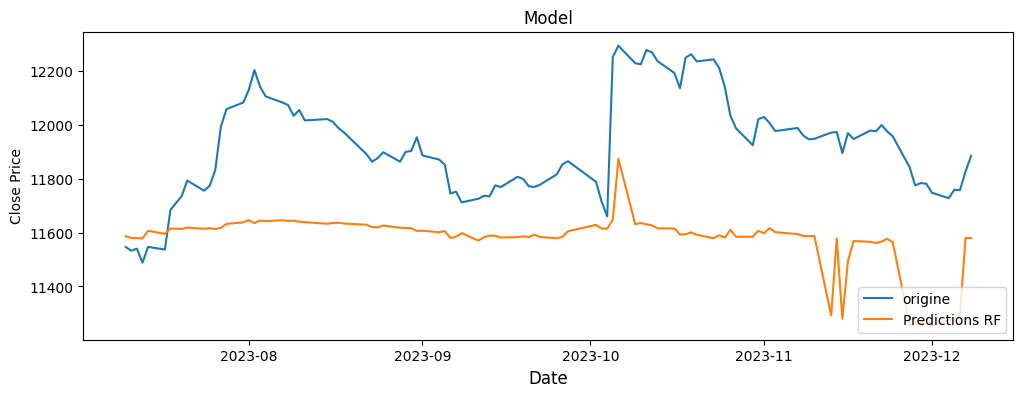

In [524]:
plt.figure(figsize = (12, 4))
plt.title("Model")
plt.xlabel("Date", fontsize = 12)
plt.ylabel('Close Price', fontsize = 10)

#plt.plot(merge_data.COURS_CLOTURE)
plt.plot(y_test_ex.index, y_test_ex.values)
plt.plot(y_test_ex.index, y_pred_rf_ex)
plt.legend(["origine", "Predictions RF"], loc = "lower right")
plt.show()

### LSTM

In [329]:
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps + 1):
        sequence = data[i : (i + time_steps)]
        sequences.append(sequence)
    return np.array(sequences)

time_steps = 1 # Choisissez le nombre de pas de temps
X_ex_sc = create_sequences(X_ex, time_steps)
X_ex_sc.shape

(611, 1, 33)

In [330]:
X_train_ex_sc = X_ex_sc[:507]
X_test_ex_sc = X_ex_sc[507:]

In [331]:
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=20,return_sequences = True,input_shape=(X_train_ex_sc.shape[1],X_train_ex_sc.shape[2])))
model.add(LSTM(units=10,return_sequences = False))
model.add(Dense(units=10))
model.add(Dense(units=1))

model.compile(loss="mean_squared_error", optimizer='adam')


# Train model
history = model.fit(X_train_ex_sc, y_train_ex, epochs = 100,batch_size = 64,validation_split=0.1)

Epoch 1/100

8/8 [==============================] - 4s 93ms/step - loss: 0.3108 - val_loss: 0.0762

Epoch 2/100

8/8 [==============================] - 0s 6ms/step - loss: 0.2291 - val_loss: 0.0375

Epoch 3/100

8/8 [==============================] - 0s 5ms/step - loss: 0.1612 - val_loss: 0.0129

Epoch 4/100

8/8 [==============================] - 0s 6ms/step - loss: 0.1008 - val_loss: 0.0095

Epoch 5/100

8/8 [==============================] - 0s 5ms/step - loss: 0.0597 - val_loss: 0.0350

Epoch 6/100

8/8 [==============================] - 0s 5ms/step - loss: 0.0447 - val_loss: 0.0596

Epoch 7/100

8/8 [==============================] - 0s 5ms/step - loss: 0.0416 - val_loss: 0.0491

Epoch 8/100

8/8 [==============================] - 0s 6ms/step - loss: 0.0361 - val_loss: 0.0316

Epoch 9/100

8/8 [==============================] - 0s 5ms/step - loss: 0.0316 - val_loss: 0.0236

Epoch 10/100

8/8 [==============================] - 0s 5ms/step - loss: 0.0272 - val_loss: 0.0204

Epoch 11

In [333]:
y_pred_lstm_ex = model.predict(X_test_ex_sc)
y_pred_lstm_ex = y_pred_lstm_ex*(y.max() - y.min()) + y.min()
rmse_lstm_ex = mean_squared_error(y_test_ex, y_pred_lstm_ex,squared=False)
print('RMSE:', rmse_lstm_ex)

4/4 [==============================] - 0s 3ms/step

RMSE: 272.7992824824004


In [533]:
Resultat_RMSE_EX['rmse_lstm'] = rmse_lstm_ex
predictions_EX['y_pred_lstm_ex'] =  y_pred_lstm_ex

In [233]:
model.summary()

Model: "sequential_7"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 lstm_11 (LSTM)              (None, 7, 50)             16800     

                                                                 

 lstm_12 (LSTM)              (None, 50)                20200     

                                                                 

 dense_12 (Dense)            (None, 10)                510       

                                                                 

 dense_13 (Dense)            (None, 1)                 11        

                                                                 


Total params: 37521 (146.57 KB)

Trainable params: 37521 (146.57 KB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________


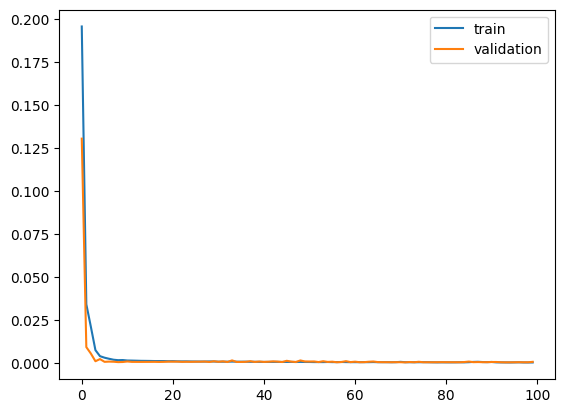

In [232]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()


<a id='7'></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>7|</span></b> <b>  Résultats et Analyses </b></div>

### RMSE : modélisation de Série Temporelle 

In [508]:
df_rmse_ST = pd.DataFrame({'Modeles' : ['XGB','RF','ARIMA','LSTM'],
                          'RMSE' : [87.99,88,165.04,86.6]})

df_rmse_ST

,Modeles,RMSE
0,XGB,87.99
1,RF,88.00
2,ARIMA,165.04
3,LSTM,86.60


### Résultats sur la modélisation de Série Temporelle 

In [498]:
predictions_st.head()

,COURS_CLOTURE,XGB_pred,RF_pred,predictions_arima,predictions_lstm
DATE,,,,,
2022-12-28,10958.35,10981.892578,11004.554651,11025.896451,10986.561523
2022-12-29,10848.85,11007.539062,11008.116411,11015.122622,10980.101562
2022-12-30,10720.25,10934.738281,10927.690772,10996.344203,10859.244141
2023-01-02,10709.14,10749.755859,10732.750307,11006.044833,10720.660156
2023-01-03,10631.58,10780.709961,10665.634781,11003.886067,10724.353516


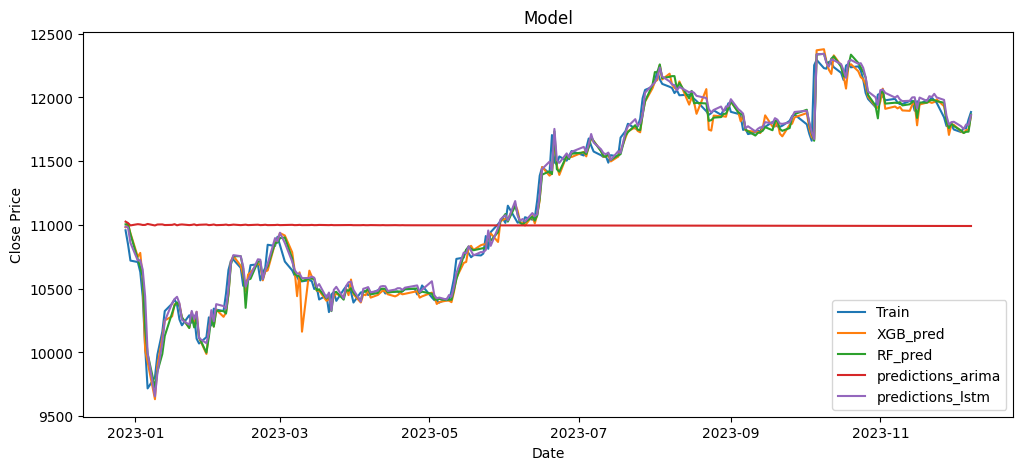

In [493]:
# visualize data
plt.figure(figsize = (12, 5))
plt.title("Model")
plt.xlabel("Date", fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)

#plt.plot(train['COURS_CLOTURE'])
plt.plot(predictions_st[['COURS_CLOTURE','XGB_pred','RF_pred','predictions_arima','predictions_lstm']])
plt.legend(["Train", 'XGB_pred','RF_pred','predictions_arima','predictions_lstm'], loc = "lower right")
plt.show()

### RMSE : Modélisation avec les Variables Explicatives 

In [1]:
df_rmse_ex = pd.DataFrame({'Modeles' : ['xgb','RF','LSTM'],'RMSE' : [157.47,393.7,272.8]})
df_rmse_ex

NameError: name 'pd' is not defined

### Résultats sur la modélisation de Série Temporelle 

In [557]:
predictions_EX

,Data_Test,y_pred_xgb_ex,y_pred_rf_ex,y_pred_lstm_ex
DATE,,,,
2023-07-10,11546.59,11554.486328,11583.916504,11470.271484
2023-07-11,11532.99,11497.474609,11576.353202,11385.791016
2023-07-12,11540.53,11496.490234,11575.676799,11360.150391
2023-07-13,11488.31,11447.401367,11577.898710,11432.780273
2023-07-14,11546.96,11502.901367,11613.082108,11511.139648
...,...,...,...,...
2023-12-04,11728.06,11700.792969,11480.330311,11430.656250
2023-12-05,11759.51,11716.446289,11483.721309,11457.759766
2023-12-06,11757.60,11709.181641,11483.724607,11433.462891


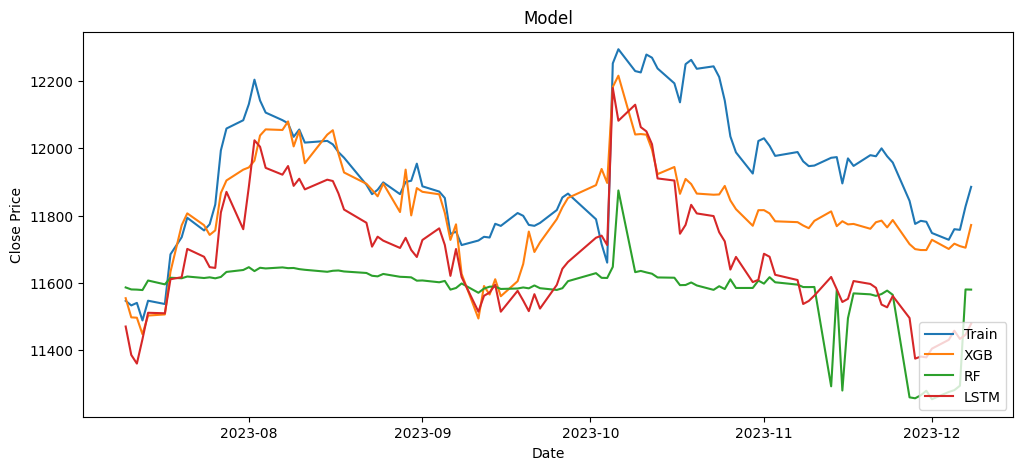

In [537]:
# visualize data
plt.figure(figsize = (12, 5))
plt.title("Model")
plt.xlabel("Date", fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)

#plt.plot(train['COURS_CLOTURE'])
plt.plot(predictions_EX[['Data_Test','y_pred_xgb_ex','y_pred_rf_ex','y_pred_lstm_ex']])
plt.legend(["Train", 'XGB','RF','LSTM'], loc = "lower right")
plt.show()

### les facteurs les plus importants

Dans le cadre de notre étude, il est crucial d'identifier les variables qui ont le plus d'impact sur la performance de l'indice MASI. En analysant les importances des variables obtenues à partir du modèle XGB, voici les résultats significatifs :

In [558]:
importances = rf.feature_importances_
feature_names = X.columns
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importances = df_importances.sort_values('Importance', ascending=False)
df_importances.head()

,Feature,Importance
21,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINA...,0.641075
11,BANQUES,0.278532
23,SOCIETES DE PORTEFEUILLES - HOLDINGS,0.027271
25,TELECOMMUNICATIONS,0.021295
13,DISTRIBUTEURS,0.006760


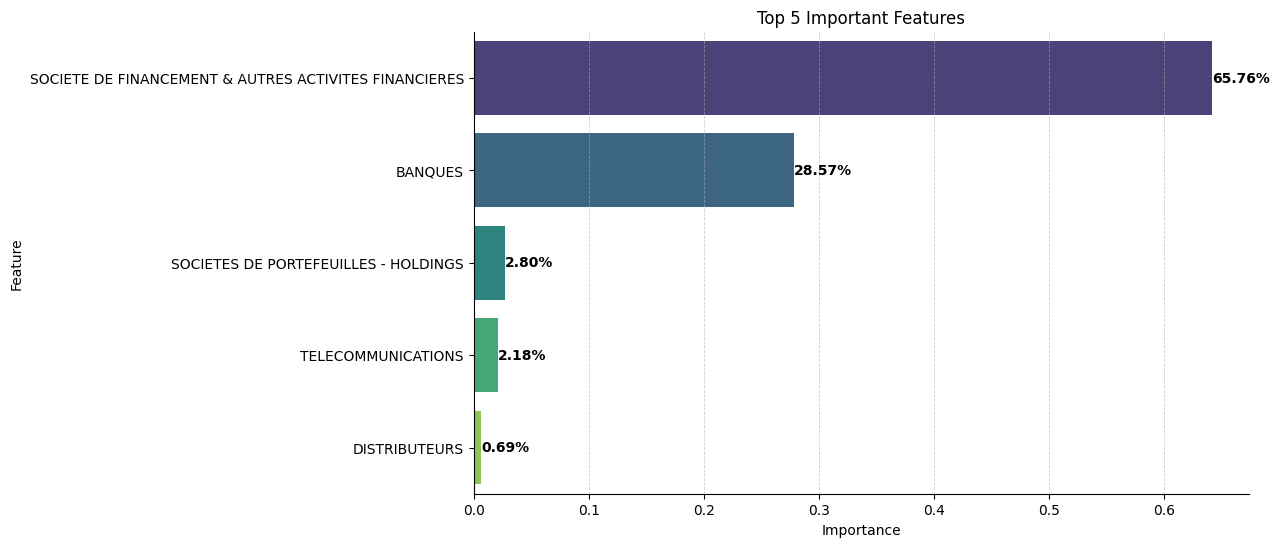

In [560]:
# Assuming df_importances is already defined
top_features = df_importances.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Add percentage labels
total_importance = top_features['Importance'].sum()
for i, value in enumerate(top_features['Importance']):
    percentage = (value / total_importance) * 100
    plt.text(value, i, f'{percentage:.2f}%', va='center', fontsize=10, color='black', fontweight='bold')

plt.title('Top 5 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Customize the appearance
sns.despine()  # Remove the top and right spines for a cleaner look
plt.grid(axis='x', linestyle='--', alpha=0.6, linewidth=0.6)  # Add a horizontal grid for reference

plt.show()
